#### $$Life\ Expectancy\ Averaged\ Project$$

##### $$Released\ by\ Jakup\ Ymeraj$$

##### $$December\ 2024$$

In [1]:
#deal with warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libraries
import numpy as np                                                                                  #type: ignore
import pandas as pd                                                                                 #type: ignore
import matplotlib.pyplot as plt                                                                     #type: ignore
import seaborn as sns                                                                               #type: ignore
from sklearn.preprocessing import StandardScaler                                                    #type: ignore
import statsmodels.graphics.mosaicplot as smgp                                                      #type: ignore
from statsmodels.graphics.mosaicplot import mosaic                                                  #type: ignore
from scipy.stats import chi2_contingency                                                            #type: ignore
import xgboost as xgb                                                                               #type: ignore
from sklearn.model_selection import train_test_split                                                #type: ignore
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error                       #type: ignore
from sklearn.model_selection import GridSearchCV                                                    #type: ignore

### **Load the dataset**

In [60]:
df = pd.read_csv(r"C:\Users\Perdorues\Downloads\Project_Datasets\Life-Expectancy-Data-Averaged.csv")
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capital,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.80497,0.01613,64.5625,24.3750,22.46250,55.3750,55.1250,0.02250,408.5625,27.45063,16.58125,15.58125,2.90000,1,59.65625
1,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.13297,4.69688,98.0000,95.9375,25.85625,98.1250,98.0625,0.02563,3071.1250,2.96938,1.61875,1.70000,9.24375,1,75.95000
2,Algeria,Africa,2007.5,26.75625,31.19375,113.43928,0.40063,88.3125,93.2500,24.86875,91.7500,91.8750,0.02188,3745.1250,34.82063,6.09375,5.97500,6.99375,1,73.78750
3,Angola,Africa,2007.5,88.76875,144.16250,297.84406,4.93563,68.8125,64.0000,22.51875,35.7500,55.5625,1.30375,2647.8125,21.62375,6.19375,6.66875,4.60625,1,52.82500
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.47881,7.75500,98.2500,75.4375,25.85000,96.9375,98.3125,0.12500,14678.7500,0.08500,3.42500,3.37500,9.01875,1,75.35000


### **Identify the numerical and categorical variables**

In [67]:
numerical_vars = df.select_dtypes(include=['number'])
num_count = numerical_vars.shape[1]
num_var_names = numerical_vars.columns.tolist()

categorical_vars = df.select_dtypes(include=['object', 'category'])
cat_count = categorical_vars.shape[1]
cat_var_names = categorical_vars.columns.tolist()

print(f'Numerical variables: {num_count}', num_var_names)
print(f'Categorical variables: {cat_count}', cat_var_names)

Numerical variables: 18 ['Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capital', 'Population_mln', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling', 'Economy_status', 'Life_expectancy']
Categorical variables: 2 ['Country', 'Region']


In [61]:
print(print(df.describe(include='all')))

            Country  Region    Year  Infant_deaths  Under_five_deaths  \
count           179     179   179.0     179.000000         179.000000   
unique          179       9     NaN            NaN                NaN   
top     Afghanistan  Africa     NaN            NaN                NaN   
freq              1      51     NaN            NaN                NaN   
mean            NaN     NaN  2007.5      30.363792          42.938268   
std             NaN     NaN     0.0      26.725485          42.916952   
min             NaN     NaN  2007.5       2.381250           3.000000   
25%             NaN     NaN  2007.5       8.159375           9.775000   
50%             NaN     NaN  2007.5      19.368750          23.137500   
75%             NaN     NaN  2007.5      48.959375          68.321875   
max             NaN     NaN  2007.5     115.718750         178.725000   

        Adult_mortality  Alcohol_consumption  Hepatitis_B     Measles  \
count        179.000000           179.000000   179

### **Dimension of the dataset**

In [5]:
df.shape

(179, 20)

### **Check for missing values**

In [6]:
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capital                0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status                 0
Life_expectancy                0
dtype: int64

##### **No missing values in dataset**

### **Check for duplicates**

In [7]:
df.duplicated().sum()

0

##### **No duplicated values in dataset**

### **Check the number of unique values in each column**

In [8]:
df.nunique()

Country                        179
Region                           9
Year                             1
Infant_deaths                  179
Under_five_deaths              177
Adult_mortality                179
Alcohol_consumption            179
Hepatitis_B                    150
Measles                        115
BMI                            158
Polio                          144
Diphtheria                     149
Incidents_HIV                  129
GDP_per_capital                179
Population_mln                 178
Thinness_ten_nineteen_years    175
Thinness_five_nine_years       172
Schooling                      170
Economy_status                   2
Life_expectancy                175
dtype: int64

### **Identify numerical and categorical variables:**

In [9]:
#numerical variables
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

#categorical variables
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Variables:", numerical_vars)
print("Categorical Variables:", categorical_vars)

Numerical Variables: ['Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capital', 'Population_mln', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling', 'Economy_status', 'Life_expectancy']
Categorical Variables: ['Country', 'Region']


### **Calculate key statistics:**

In [10]:
def key_statistics(df):
    stats = {}
    
    variables = numerical_vars
    
    for var in variables:
        stats[f"{var}_mean"] = df[var].mean()
        stats[f"{var}_mode"] = df[var].mode()[0]
        stats[f"{var}_std_dev"] = df[var].std()
        stats[f"{var}_variance"] = df[var].var()
        stats[f"{var}_percentiles"] = df[var].quantile([0.00, 0.25, 0.50, 0.75])
        stats[f"{var}_skewness"] = df[var].skew()
        stats[f"{var}_kurtosis"] = df[var].kurtosis()
    
    return stats

mean_scores = key_statistics(df)


In [11]:
print('<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>')
for var in numerical_vars:
    mean_key = f"{var}_mean"
    print(f"The mean for {var.replace('_', ' ').capitalize()} is {mean_scores[mean_key]:.2f}.")
print('<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>')

<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>
The mean for Year is 2007.50.
The mean for Infant deaths is 30.36.
The mean for Under five deaths is 42.94.
The mean for Adult mortality is 192.25.
The mean for Alcohol consumption is 4.82.
The mean for Hepatitis b is 84.29.
The mean for Measles is 77.34.
The mean for Bmi is 25.03.
The mean for Polio is 86.50.
The mean for Diphtheria is 86.27.
The mean for Incidents hiv is 0.89.
The mean for Gdp per capital is 11540.92.
The mean for Population mln is 36.68.
The mean for Thinness ten nineteen years is 4.87.
The mean for Thinness five nine years is 4.90.
The mean for Schooling is 7.63.
The mean for Economy status is 0.79.
The mean for Life expectancy is 68.86.
<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>


In [12]:
print('<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>')
for var in numerical_vars:
    mode_key = f"{var}_mode"
    print(f"The mode for {var.replace('_', ' ').capitalize()} is {mean_scores[mode_key]:.2f}.")
print('<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>')

<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>
The mode for Year is 2007.50.
The mode for Infant deaths is 2.38.
The mode for Under five deaths is 4.60.
The mode for Adult mortality is 57.71.
The mode for Alcohol consumption is 0.00.
The mode for Hepatitis b is 88.00.
The mode for Measles is 64.00.
The mode for Bmi is 25.96.
The mode for Polio is 94.25.
The mode for Diphtheria is 95.00.
The mode for Incidents hiv is 0.08.
The mode for Gdp per capital is 263.94.
The mode for Population mln is 0.17.
The mode for Thinness ten nineteen years is 0.75.
The mode for Thinness five nine years is 0.91.
The mode for Schooling is 2.87.
The mode for Economy status is 1.00.
The mode for Life expectancy is 59.66.
<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>


In [13]:
print('<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>')
for var in numerical_vars:
    std_dev_key = f"{var}_std_dev"
    std_dev_value = mean_scores[std_dev_key]
    print(f"The standard deviation for {var.replace('_', ' ').capitalize()} is {std_dev_value:.2f}.")
    print(f"A standard deviation of {std_dev_value:.2f} suggests that most of the data points fall within {std_dev_value:.2f} units of the mean value.")
print('<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>')

<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>
The standard deviation for Year is 0.00.
A standard deviation of 0.00 suggests that most of the data points fall within 0.00 units of the mean value.
The standard deviation for Infant deaths is 26.73.
A standard deviation of 26.73 suggests that most of the data points fall within 26.73 units of the mean value.
The standard deviation for Under five deaths is 42.92.
A standard deviation of 42.92 suggests that most of the data points fall within 42.92 units of the mean value.
The standard deviation for Adult mortality is 111.66.
A standard deviation of 111.66 suggests that most of the data points fall within 111.66 units of the mean value.
The standard deviation for Alcohol consumption is 3.91.
A standard deviation of 3.91 suggests that most of the data points fall within 3.91 units of the mean value.
The standard deviation for Hepatitis b is 13.82.
A standard deviation of 13.82 suggests that

In [14]:
print('<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>')
for var in numerical_vars:
    variance_key = f"{var}_variance"
    variance_value = mean_scores[variance_key]
    print(f"The variance for {var.replace('_', ' ').capitalize()} is {variance_value:.2f}.")
    print(f"A variance of {variance_value:.2f} suggests that the data points in the dataset tend to deviate from the mean by a significant amount of {variance_value:.2f}.")
print('<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>')

<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>
The variance for Year is 0.00.
A variance of 0.00 suggests that the data points in the dataset tend to deviate from the mean by a significant amount of 0.00.
The variance for Infant deaths is 714.25.
A variance of 714.25 suggests that the data points in the dataset tend to deviate from the mean by a significant amount of 714.25.
The variance for Under five deaths is 1841.86.
A variance of 1841.86 suggests that the data points in the dataset tend to deviate from the mean by a significant amount of 1841.86.
The variance for Adult mortality is 12467.74.
A variance of 12467.74 suggests that the data points in the dataset tend to deviate from the mean by a significant amount of 12467.74.
The variance for Alcohol consumption is 15.32.
A variance of 15.32 suggests that the data points in the dataset tend to deviate from the mean by a significant amount of 15.32.
The variance for Hepatitis b is 19

In [15]:
print('<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>')
for var in numerical_vars:
    percentiles_key = f"{var}_percentiles"
    print(f"The percentiles for {var.replace('_', ' ').capitalize()} are:\n{mean_scores[percentiles_key]}")
print('<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>')

<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>
The percentiles for Year are:
0.00    2007.5
0.25    2007.5
0.50    2007.5
0.75    2007.5
Name: Year, dtype: float64
The percentiles for Infant deaths are:
0.00     2.381250
0.25     8.159375
0.50    19.368750
0.75    48.959375
Name: Infant_deaths, dtype: float64
The percentiles for Under five deaths are:
0.00     3.000000
0.25     9.775000
0.50    23.137500
0.75    68.321875
Name: Under_five_deaths, dtype: float64
The percentiles for Adult mortality are:
0.00     57.71031
0.25    107.04691
0.50    164.43241
0.75    247.52392
Name: Adult_mortality, dtype: float64
The percentiles for Alcohol consumption are:
0.00    0.000025
0.25    1.317815
0.50    4.209380
0.75    7.843440
Name: Alcohol_consumption, dtype: float64
The percentiles for Hepatitis b are:
0.00    30.68750
0.25    78.21875
0.50    88.00000
0.75    94.37500
Name: Hepatitis_B, dtype: float64
The percentiles for Measles are:
0.00 

In [16]:
print('<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>')
for var in numerical_vars:
    skewness_key = f"{var}_skewness"
    skewness_value = mean_scores[skewness_key]
    print(f"The skewness for {var.replace('_', ' ').capitalize()} is {skewness_value:.2f}.")
    
    if skewness_value > 0:
        print("In this type of distribution, most values are concentrated on the left side of the mean, indicating that a few higher values pull the mean up.")
    elif skewness_value < 0:
        print("In this type of distribution, most values are concentrated on the right side of the mean, indicating that a few lower values pull the mean down.")
    else:
        print("The distribution is symmetrical, with no skewness.")

print('<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>')

<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>
The skewness for Year is 0.00.
The distribution is symmetrical, with no skewness.
The skewness for Infant deaths is 0.98.
In this type of distribution, most values are concentrated on the left side of the mean, indicating that a few higher values pull the mean up.
The skewness for Under five deaths is 1.20.
In this type of distribution, most values are concentrated on the left side of the mean, indicating that a few higher values pull the mean up.
The skewness for Adult mortality is 1.21.
In this type of distribution, most values are concentrated on the left side of the mean, indicating that a few higher values pull the mean up.
The skewness for Alcohol consumption is 0.52.
In this type of distribution, most values are concentrated on the left side of the mean, indicating that a few higher values pull the mean up.
The skewness for Hepatitis b is -1.55.
In this type of distribution, most va

In [17]:
print('<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>')
for var in numerical_vars:
    kurtosis_key = f"{var}_kurtosis"
    kurtosis_value = mean_scores[kurtosis_key]
    print(f"The kurtosis for {var.replace('_', ' ').capitalize()} is {kurtosis_value:.2f}.")
    
    if kurtosis_value > 0:
        print("The distribution has a positive kurtosis value, which means that the distribution has more data in the tails and a higher peak around the mean than a normal distribution.")
    elif kurtosis_value < 0:
        print("The distribution has a negative kurtosis value, which means that the distribution has fewer extreme values (outliers) in the tails and a more uniform spread of data around the mean.")
    else:
        print("The distribution has a kurtosis value of zero, indicating a normal distribution.")

print('<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>')

<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>
The kurtosis for Year is 0.00.
The distribution has a kurtosis value of zero, indicating a normal distribution.
The kurtosis for Infant deaths is -0.02.
The distribution has a negative kurtosis value, which means that the distribution has fewer extreme values (outliers) in the tails and a more uniform spread of data around the mean.
The kurtosis for Under five deaths is 0.42.
The distribution has a positive kurtosis value, which means that the distribution has more data in the tails and a higher peak around the mean than a normal distribution.
The kurtosis for Adult mortality is 1.21.
The distribution has a positive kurtosis value, which means that the distribution has more data in the tails and a higher peak around the mean than a normal distribution.
The kurtosis for Alcohol consumption is -0.88.
The distribution has a negative kurtosis value, which means that the distribution has fewer 

### **Maximal & Minimal values of each variable:**

In [18]:

max_values = {}
min_values = {}

for variable in numerical_vars:
    if variable in df.columns: 
        
        max_row = df.loc[df[variable] == df[variable].max()]
        max_values[variable] = {
            'value': max_row[variable].values[0],
            'country': max_row['Country'].values[0]
        }
        
        min_row = df.loc[df[variable] == df[variable].min()]
        min_values[variable] = {
            'value': min_row[variable].values[0],
            'country': min_row['Country'].values[0]
        }

In [19]:
print('\n''<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>')
print("Maximum Values:")
for var, info in max_values.items():
    print(f"{var}: {info['value']} (Country: {info['country']})")
print('<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>')


<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>
Maximum Values:
Year: 2007.5 (Country: Afghanistan)
Infant_deaths: 115.71875 (Country: Sierra Leone)
Under_five_deaths: 178.725 (Country: Sierra Leone)
Adult_mortality: 572.97431 (Country: Zimbabwe)
Alcohol_consumption: 15.1 (Country: Estonia)
Hepatitis_B: 98.875 (Country: Fiji)
Measles: 99.0 (Country: Hungary)
BMI: 31.6875 (Country: Tonga)
Polio: 98.9375 (Country: Hungary)
Diphtheria: 99.0 (Country: Hungary)
Incidents_HIV: 18.16438 (Country: Eswatini)
GDP_per_capital: 102972.6875 (Country: Luxembourg)
Population_mln: 1321.23938 (Country: China)
Thinness_ten_nineteen_years: 27.1 (Country: India)
Thinness_five_nine_years: 27.94375 (Country: India)
Schooling: 13.26875 (Country: Germany)
Economy_status: 1 (Country: Afghanistan)
Life_expectancy: 82.45625 (Country: Japan)
<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>


In [20]:
print('\n''<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>')
print("Minimum Values:")
for var, info in min_values.items():
    print(f"{var}: {info['value']} (Country: {info['country']})")
print('<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>')


<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>
Minimum Values:
Year: 2007.5 (Country: Afghanistan)
Infant_deaths: 2.38125 (Country: Singapore)
Under_five_deaths: 3.0 (Country: Singapore)
Adult_mortality: 57.71031 (Country: Malta)
Alcohol_consumption: 2.5e-05 (Country: Somalia)
Hepatitis_B: 30.6875 (Country: Chad)
Measles: 16.25 (Country: Suriname)
BMI: 20.2125 (Country: Ethiopia)
Polio: 35.75 (Country: Angola)
Diphtheria: 31.3125 (Country: Chad)
Incidents_HIV: 0.01 (Country: Bangladesh)
GDP_per_capital: 263.9375 (Country: Somalia)
Population_mln: 0.085 (Country: Antigua and Barbuda)
Thinness_ten_nineteen_years: 0.1 (Country: Tonga)
Thinness_five_nine_years: 0.1 (Country: Tonga)
Schooling: 1.3375 (Country: Burkina Faso)
Economy_status: 0 (Country: Australia)
Life_expectancy: 45.60625 (Country: Lesotho)
<~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~>


In [21]:
def contingency_table(df, col1, col2):
    table = pd.crosstab(df[col1], df[col2], normalize='index') * 100
    chi2, p, dof, expected = chi2_contingency(table)
    return table, chi2, p, dof, expected

print('\nContingency Table (Country vs Region):')
table, chi2_1, p1, dof1, expected1 = contingency_table(df, 'Country', 'Region')
print(table)


Contingency Table (Country vs Region):
Region               Africa   Asia  Central America and Caribbean  \
Country                                                             
Afghanistan             0.0  100.0                            0.0   
Albania                 0.0    0.0                            0.0   
Algeria               100.0    0.0                            0.0   
Angola                100.0    0.0                            0.0   
Antigua and Barbuda     0.0    0.0                          100.0   
...                     ...    ...                            ...   
Venezuela, RB           0.0    0.0                            0.0   
Vietnam                 0.0  100.0                            0.0   
Yemen, Rep.             0.0    0.0                            0.0   
Zambia                100.0    0.0                            0.0   
Zimbabwe              100.0    0.0                            0.0   

Region               European Union  Middle East  North Americ

### **Apply the Chi^2 test to the data**

In [22]:
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 143200.0
P-value: 0.0
Degrees of Freedom: 1424
Expected Frequencies:
 [[28.49162011 15.08379888 10.61452514 ...  6.1452514   8.37988827
   6.70391061]
 [28.49162011 15.08379888 10.61452514 ...  6.1452514   8.37988827
   6.70391061]
 [28.49162011 15.08379888 10.61452514 ...  6.1452514   8.37988827
   6.70391061]
 ...
 [28.49162011 15.08379888 10.61452514 ...  6.1452514   8.37988827
   6.70391061]
 [28.49162011 15.08379888 10.61452514 ...  6.1452514   8.37988827
   6.70391061]
 [28.49162011 15.08379888 10.61452514 ...  6.1452514   8.37988827
   6.70391061]]


##### **Interpret the result**

In [23]:
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the variables.")

Reject the null hypothesis: There is a significant association between the variables.


## **Data Visualization**

### **Distributions**

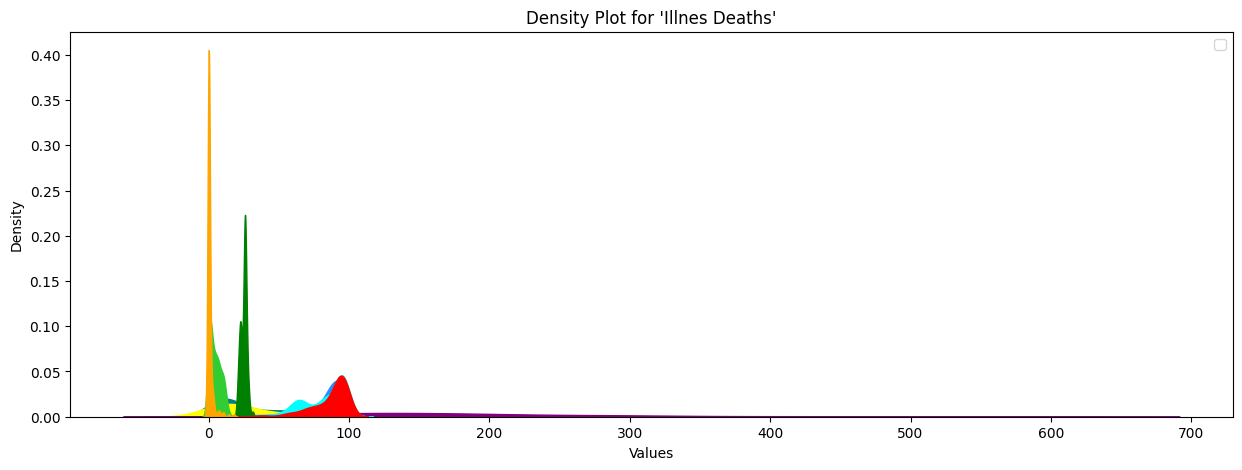

In [24]:
#create a distribution plots for each illneses in dataset
plt.figure(figsize=(15, 5))

sns.kdeplot(df['Infant_deaths'], label="", color='teal', alpha=1, fill=True)
sns.kdeplot(df['Under_five_deaths'], label="", color='yellow', alpha=1, fill=True)
sns.kdeplot(df['Adult_mortality'], label="", color='purple', alpha=1, fill=True)
sns.kdeplot(df['Alcohol_consumption'], label="", color='#32cd32', alpha=1, fill=True)
sns.kdeplot(df['Hepatitis_B'], label="", color='dodgerblue', alpha=1, fill=True)
sns.kdeplot(df['Measles'], label="", color='cyan', alpha=1, fill=True)
sns.kdeplot(df['BMI'], label="", color='green', alpha=1, fill=True)
sns.kdeplot(df['Polio'], label="", color='cyan', alpha=1, fill=True)
sns.kdeplot(df['Diphtheria'], label="", color='red', alpha=1, fill=True)
sns.kdeplot(df['Incidents_HIV'], label="", color='orange', alpha=1, fill=True)

plt.title("Density Plot for 'Illnes Deaths'")
plt.xlabel("Values")
plt.ylabel("Density")

plt.legend()
plt.show()

### **Thinness score and Schooling Distribution**

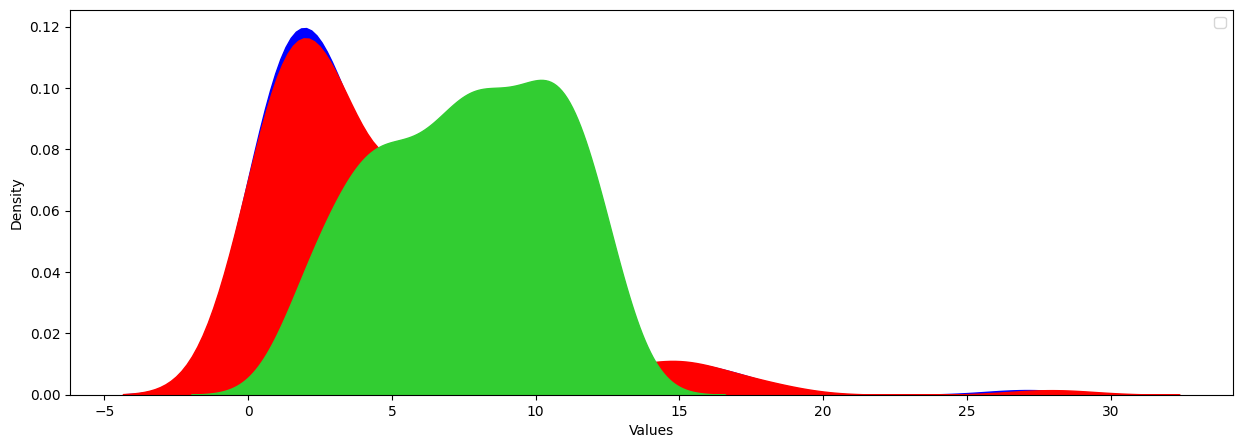

In [25]:
plt.figure(figsize=(15, 5))

sns.kdeplot(df['Thinness_ten_nineteen_years'], label="", color='blue', alpha=1, fill=True)
sns.kdeplot(df['Thinness_five_nine_years'], label="", color='red', alpha=1, fill=True)
sns.kdeplot(df['Schooling'], label="", color='#32cd32', alpha=1, fill=True)

plt.xlabel("Values")
plt.ylabel("Density")

plt.legend()
plt.show()

### **Life Expectancy and Population Distribution**

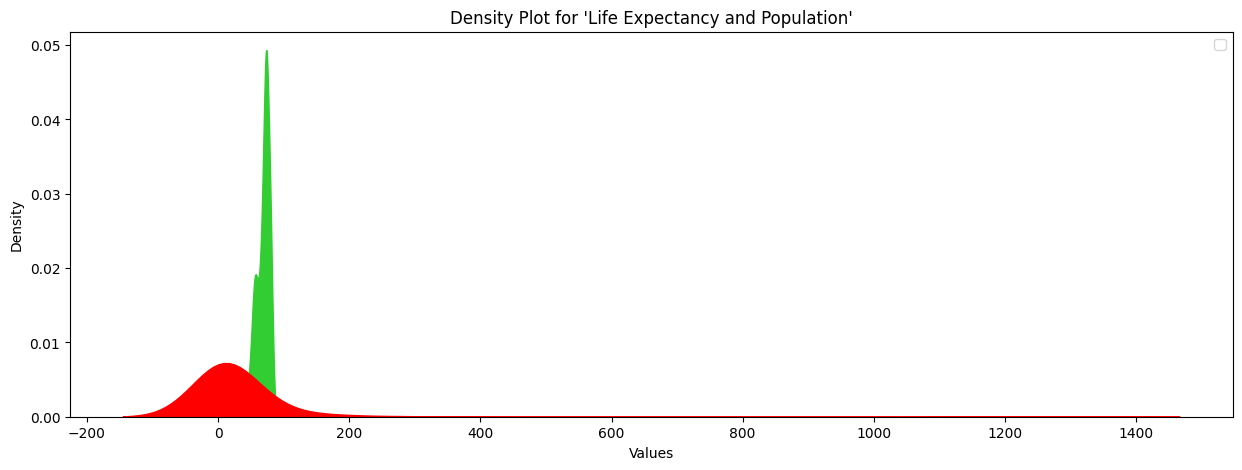

In [26]:
plt.figure(figsize=(15, 5))

sns.kdeplot(df['Life_expectancy'], label="", color='#32cd32', alpha=1, fill=True)
sns.kdeplot(df['Population_mln'], label="", color='red', alpha=1, fill=True)

plt.title("Density Plot for 'Life Expectancy and Population'")

plt.xlabel("Values")
plt.ylabel("Density")

plt.legend()
plt.show()

### **Distribution of 'Countries GDP'**

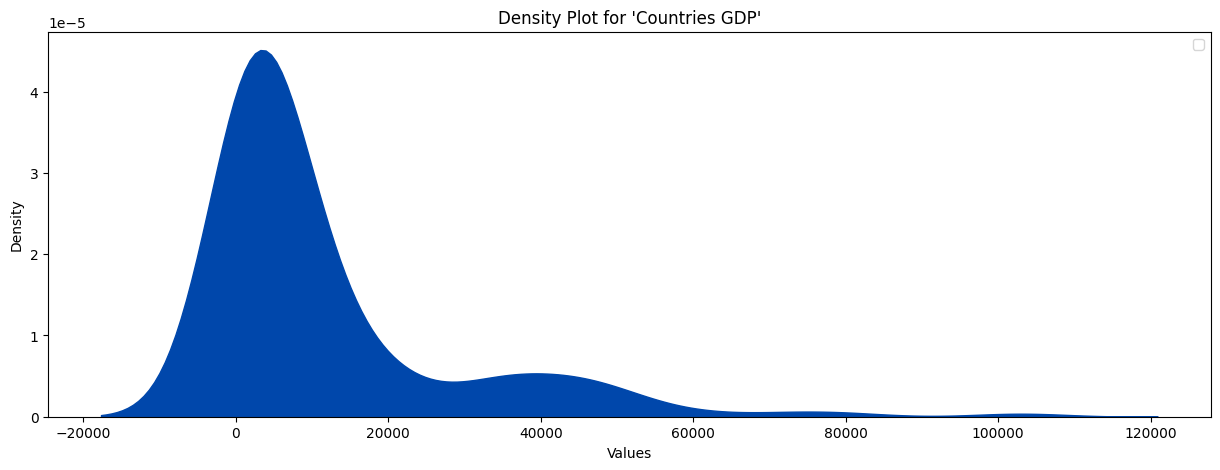

In [27]:
plt.figure(figsize=(15, 5))

sns.kdeplot(df['GDP_per_capital'], label="", color='#0047ab', alpha=1, fill=True)

plt.title("Density Plot for 'Countries GDP'")

plt.xlabel("Values")
plt.ylabel("Density")

plt.legend()
plt.show()

### **Distribution of Each Country in their corresponding regions**

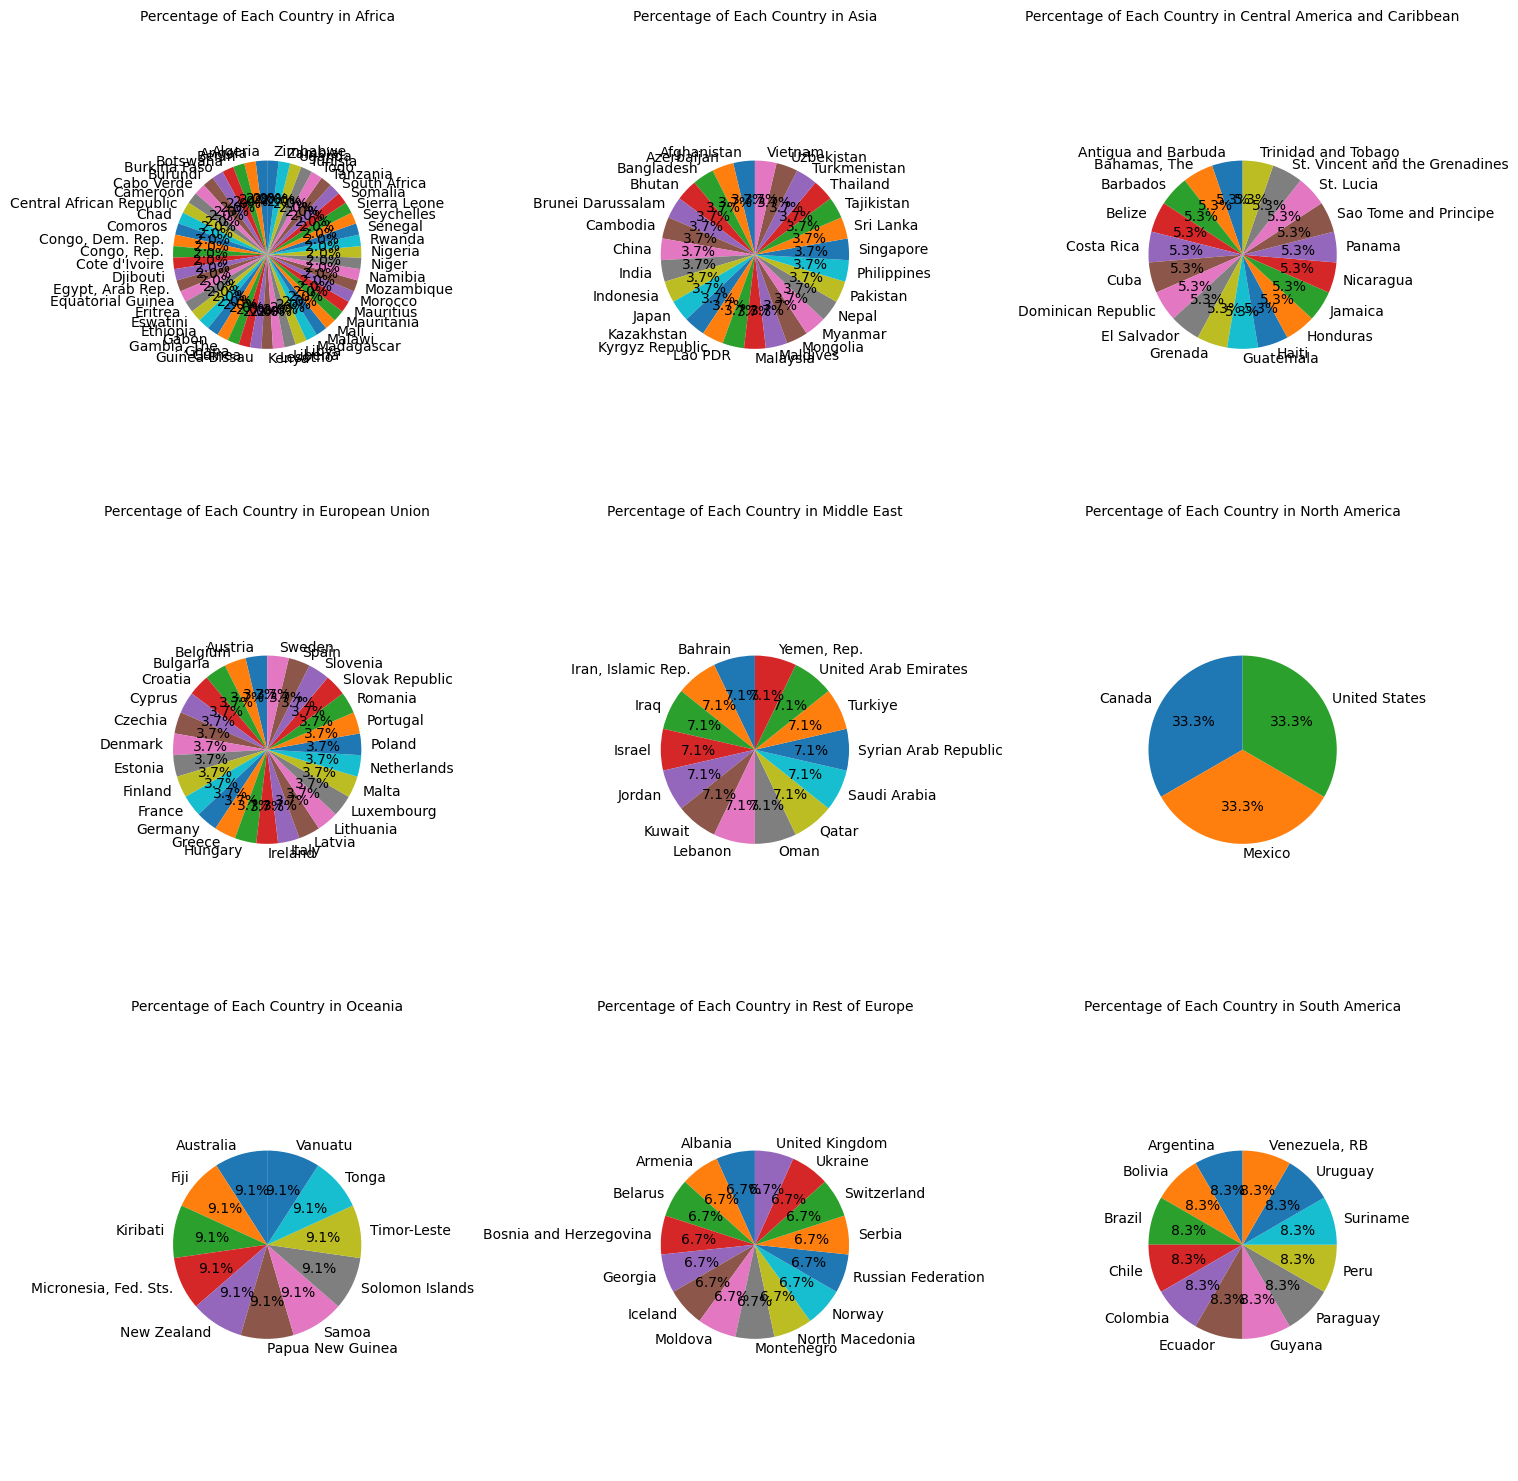

In [28]:
data = {
    'Country': df['Country'],
        'Region': df['Region']   
}

#group by Region and Country, then count occurrences
region_country_counts = df.groupby(['Region', 'Country']).size().reset_index(name='Count')

#get unique regions
regions = region_country_counts['Region'].unique()

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

#create pie charts for each region
for ax, region in zip(axes, regions):
    region_data = region_country_counts[region_country_counts['Region'] == region]
    
    ax.pie(region_data['Count'], labels=region_data['Country'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Percentage of Each Country in {region}', size=10)
    ax.axis('equal')

#hide any unused subplots (if there are fewer than 9 regions)
for i in range(len(regions), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## **Making comparisons**

### **Top 10 Countries with Highest and Lowest Population (in million)**

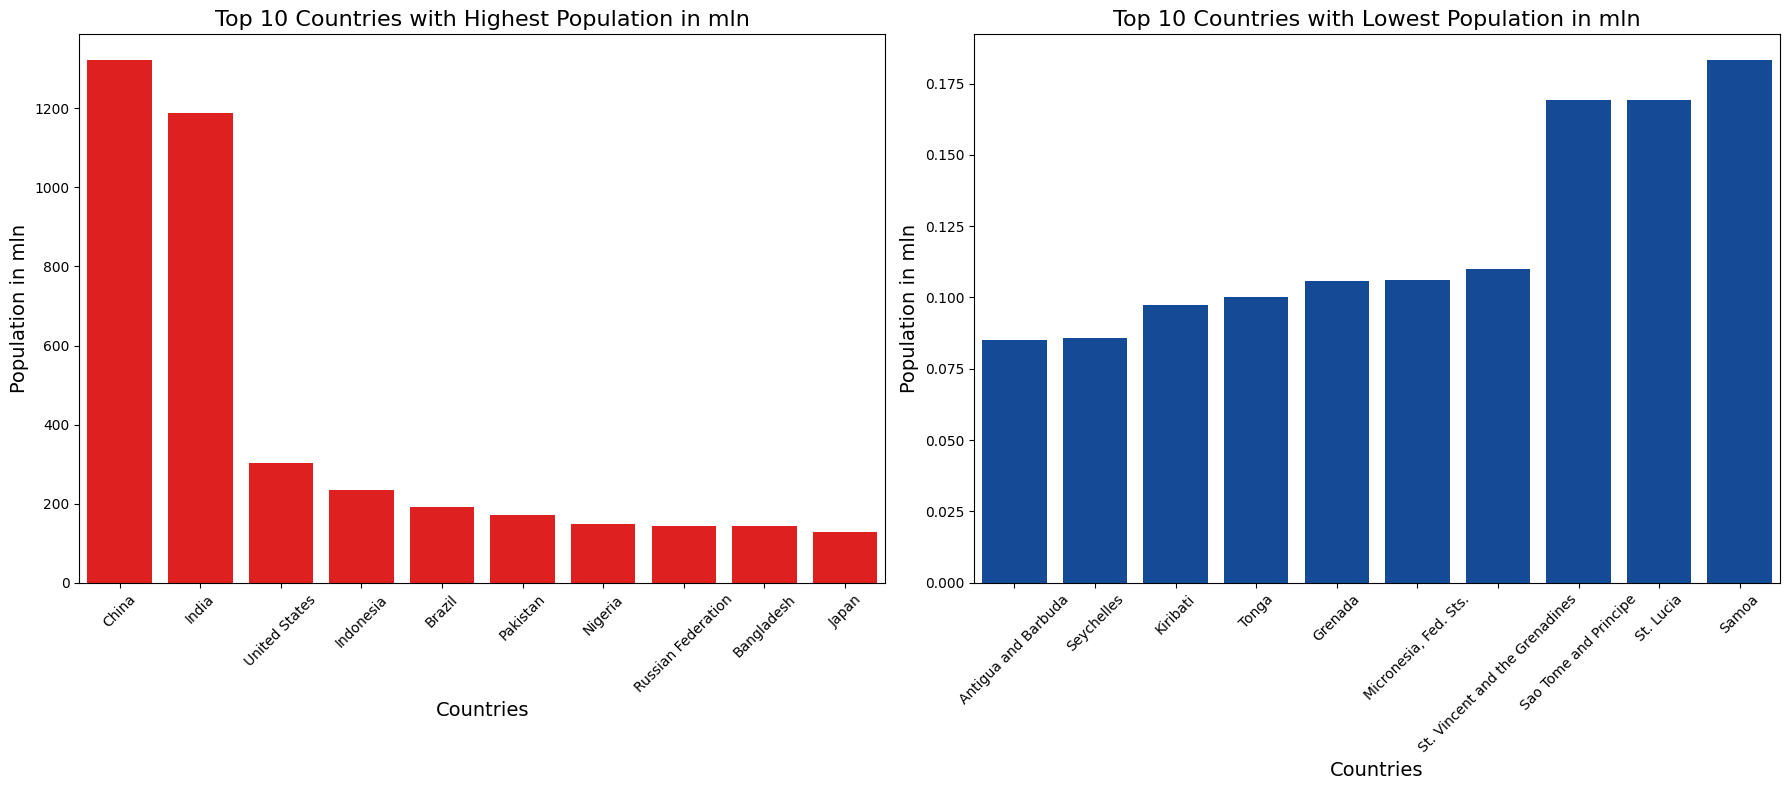

In [29]:
top_10 = df.nlargest(10, 'Population_mln')
top_10_lowest = df.nsmallest(10, 'Population_mln')

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(data=top_10, x='Country', y='Population_mln', color='red', ax=axes[0])
axes[0].set_title('Top 10 Countries with Highest Population in mln', size=16)
axes[0].set_xlabel('Countries', size=14)
axes[0].set_ylabel('Population in mln', size=14)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=top_10_lowest, x='Country', y='Population_mln', color='#0047ab', ax=axes[1])
axes[1].set_title('Top 10 Countries with Lowest Population in mln', size=16)
axes[1].set_xlabel('Countries', size=14)
axes[1].set_ylabel('Population in mln', size=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### **Adult Mortality**

### **Top 10 Countries with Highest and Lowest Adult Mortality**

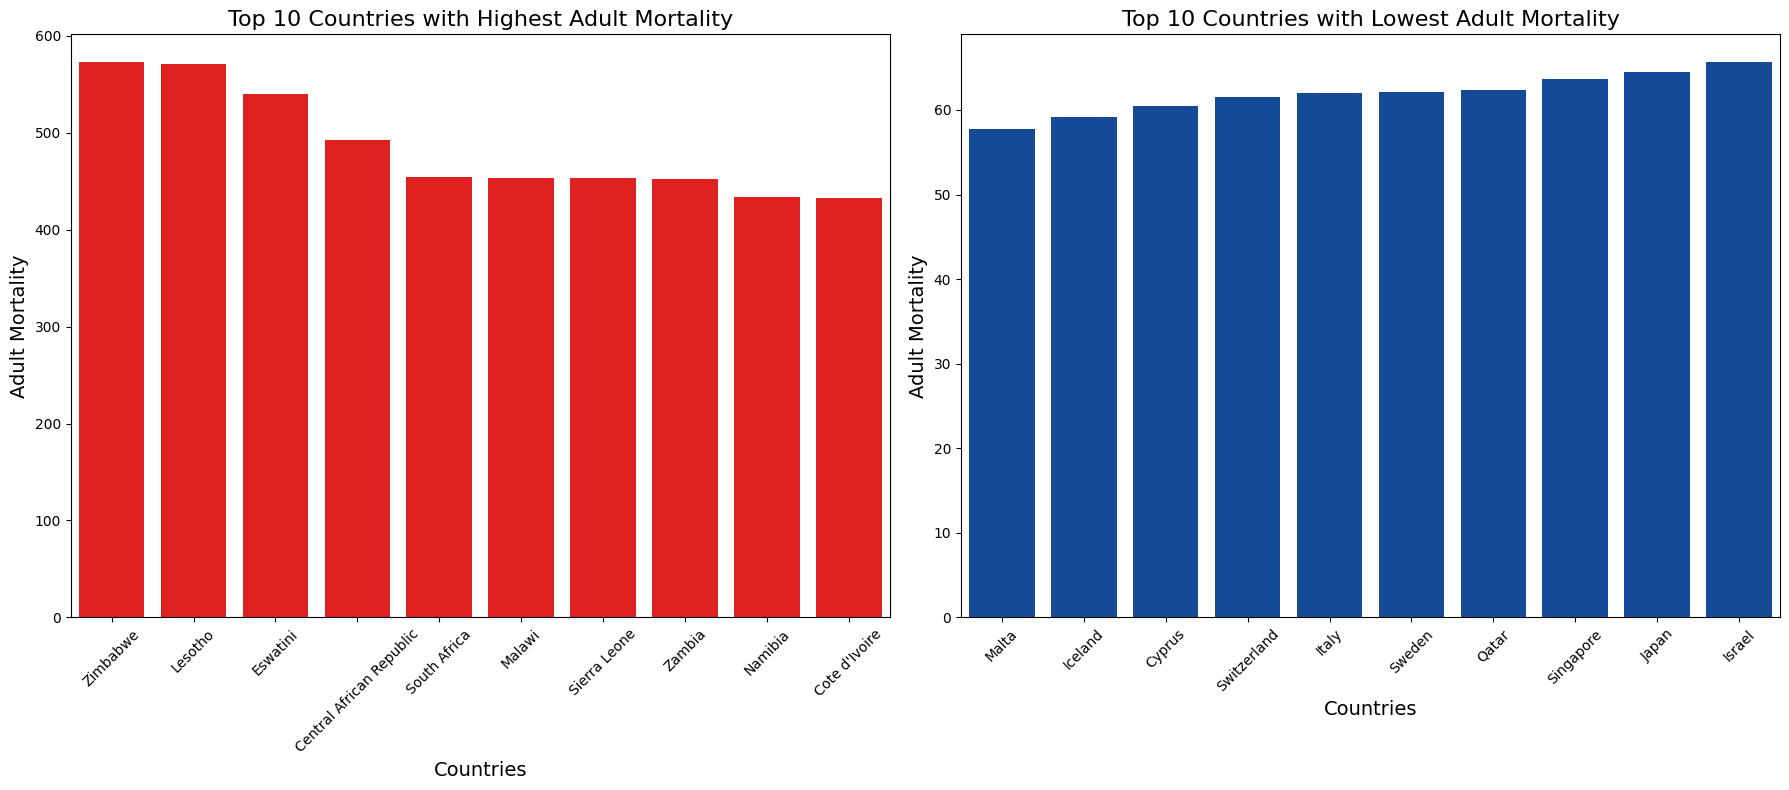

In [30]:
top_10 = df.nlargest(10, 'Adult_mortality')
top_10_lowest = df.nsmallest(10, 'Adult_mortality')

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(data=top_10, x='Country', y='Adult_mortality', color='red', ax=axes[0])
axes[0].set_title('Top 10 Countries with Highest Adult Mortality', size=16)
axes[0].set_xlabel('Countries', size=14)
axes[0].set_ylabel('Adult Mortality', size=14)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=top_10_lowest, x='Country', y='Adult_mortality', color='#0047ab', ax=axes[1])
axes[1].set_title('Top 10 Countries with Lowest Adult Mortality', size=16)
axes[1].set_xlabel('Countries', size=14)
axes[1].set_ylabel('Adult Mortality', size=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### **Top 10 Countries with Highest and Lowest Under Five Deaths**

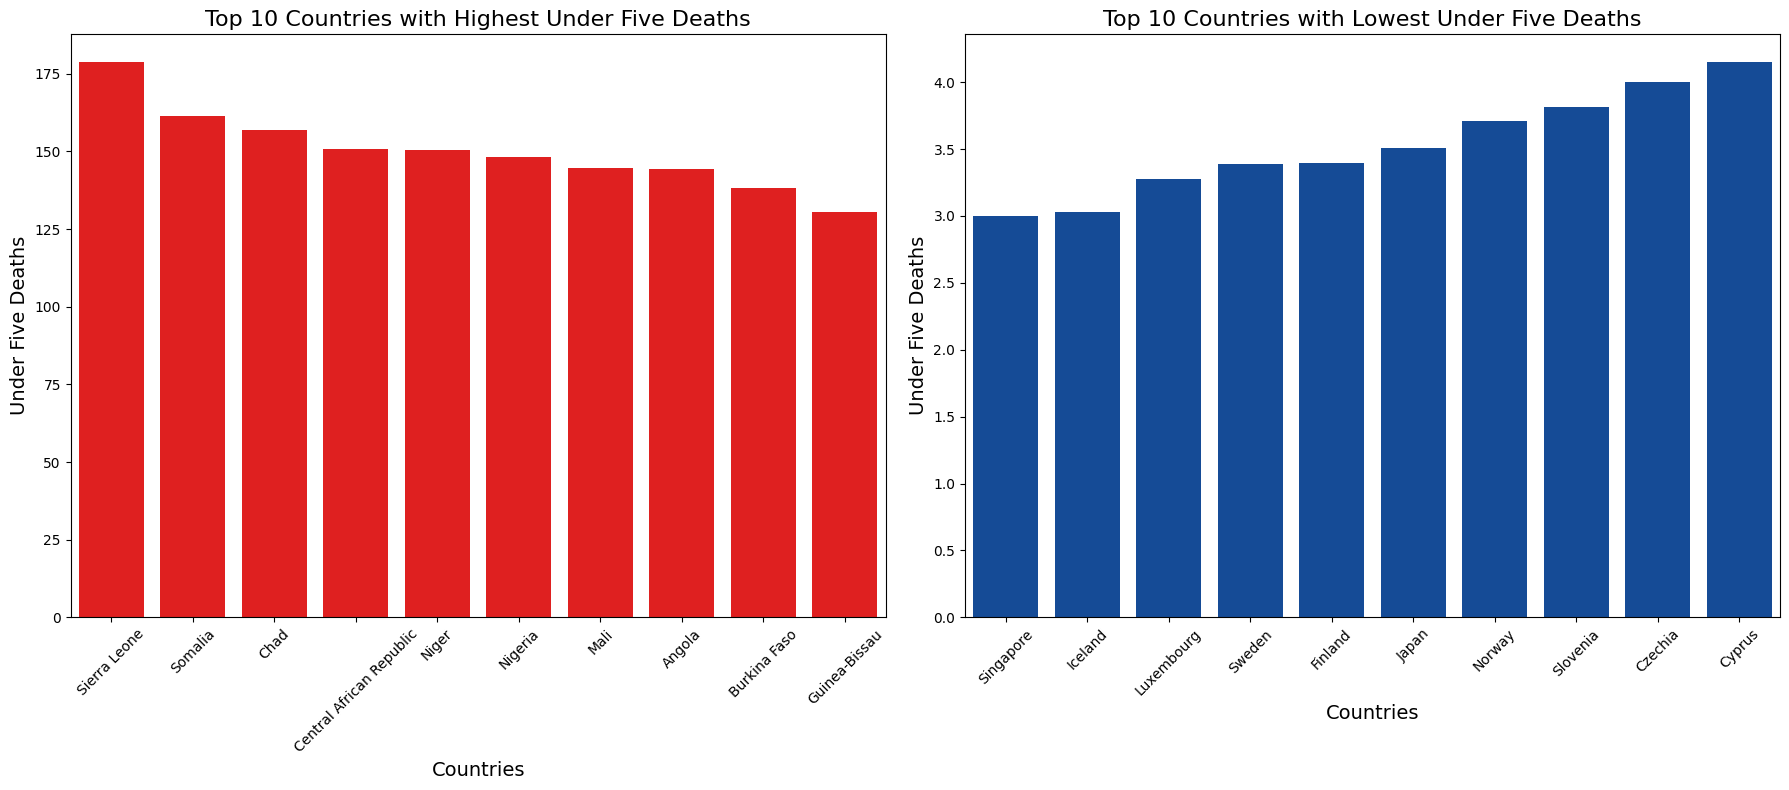

In [31]:
top_10 = df.nlargest(10, 'Under_five_deaths')
top_10_lowest = df.nsmallest(10, 'Under_five_deaths')

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(data=top_10, x='Country', y='Under_five_deaths', color='red', ax=axes[0])
axes[0].set_title('Top 10 Countries with Highest Under Five Deaths', size=16)
axes[0].set_xlabel('Countries', size=14)
axes[0].set_ylabel('Under Five Deaths', size=14)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=top_10_lowest, x='Country', y='Under_five_deaths', color='#0047ab', ax=axes[1])
axes[1].set_title('Top 10 Countries with Lowest Under Five Deaths', size=16)
axes[1].set_xlabel('Countries', size=14)
axes[1].set_ylabel('Under Five Deaths', size=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### **Infant Deaths**

### **Top 10 Countries with Highest and Lowest Infant Deaths**

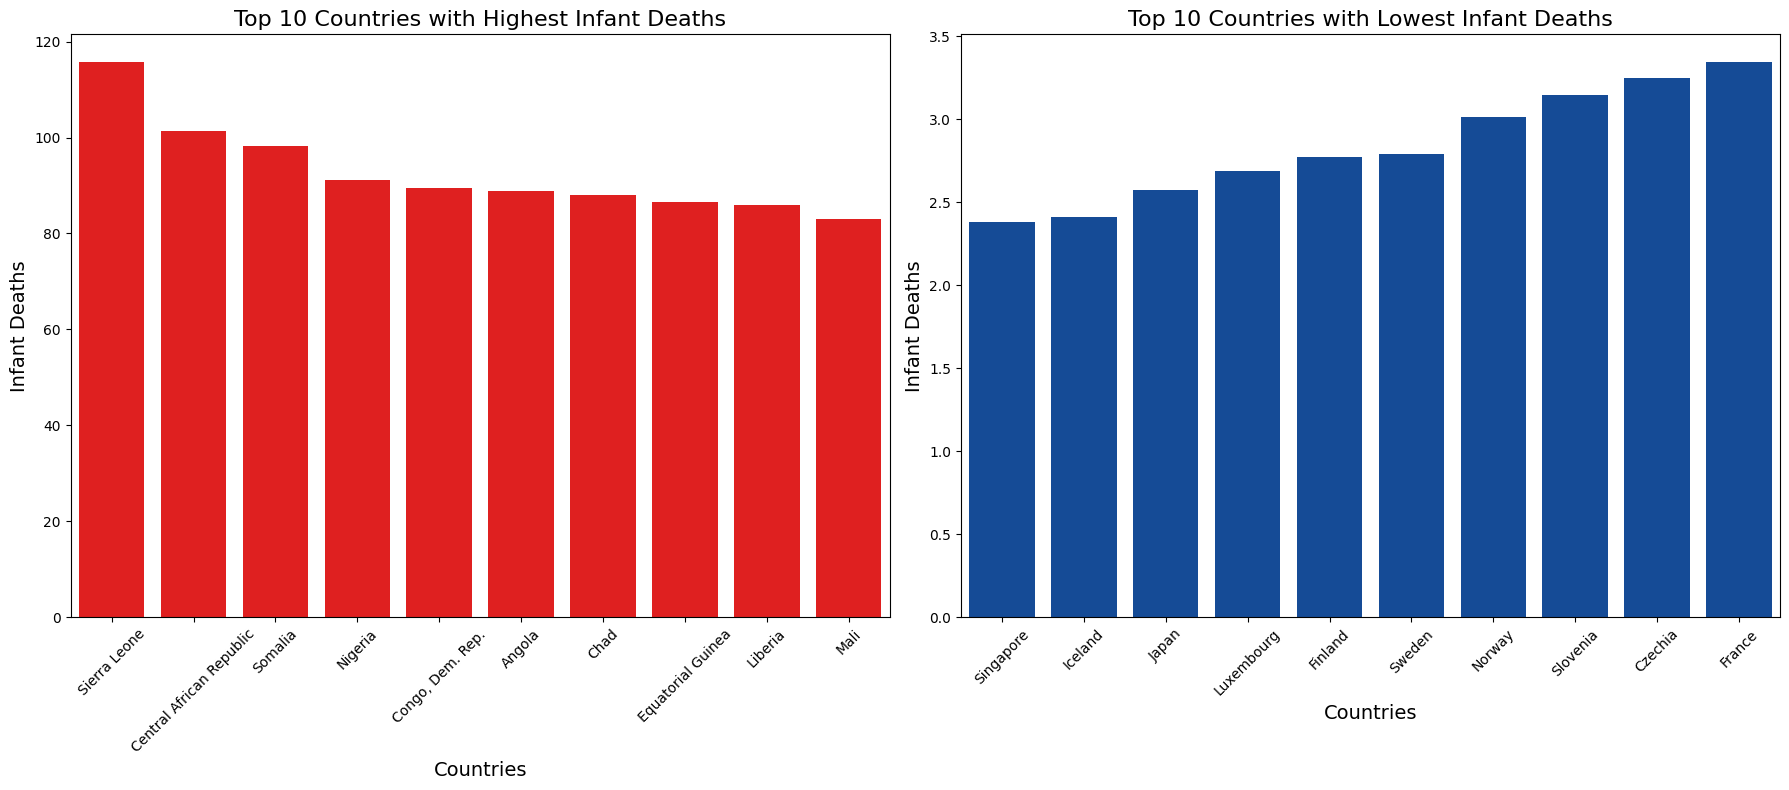

In [32]:
top_10 = df.nlargest(10, 'Infant_deaths')
top_10_lowest = df.nsmallest(10, 'Infant_deaths')

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(data=top_10, x='Country', y='Infant_deaths', color='red', ax=axes[0])
axes[0].set_title('Top 10 Countries with Highest Infant Deaths', size=16)
axes[0].set_xlabel('Countries', size=14)
axes[0].set_ylabel('Infant Deaths', size=14)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=top_10_lowest, x='Country', y='Infant_deaths', color='#0047ab', ax=axes[1])
axes[1].set_title('Top 10 Countries with Lowest Infant Deaths', size=16)
axes[1].set_xlabel('Countries', size=14)
axes[1].set_ylabel('Infant Deaths', size=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### **Alcohol Consumption**

### **Top 10 Countries with Highest and Lowest Alcohol Consumption**

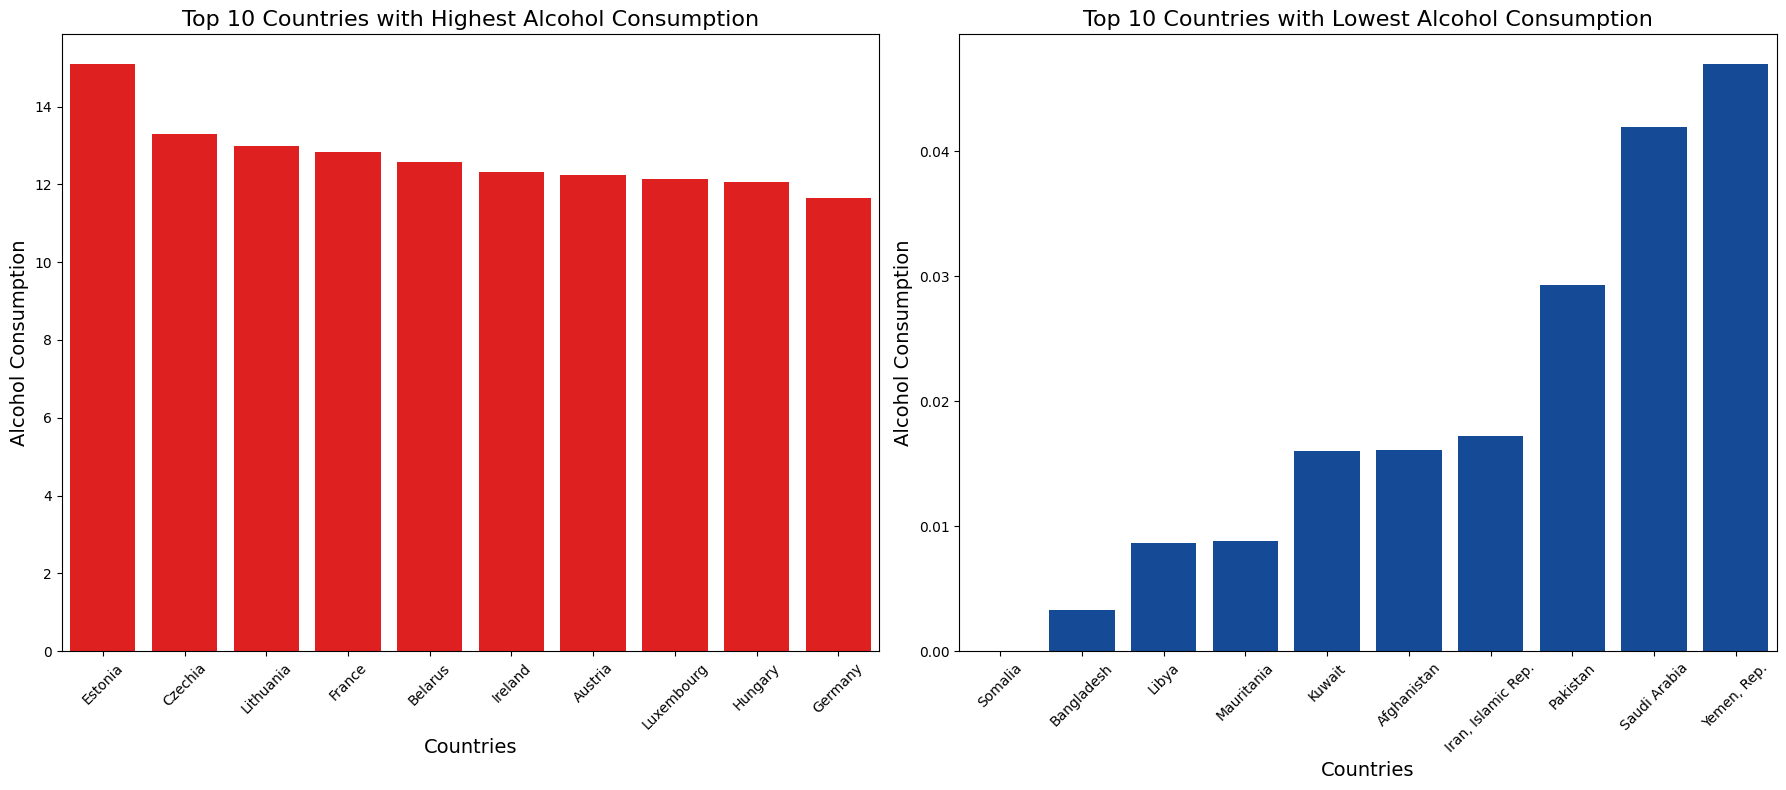

In [33]:
top_10 = df.nlargest(10, 'Alcohol_consumption')
top_10_lowest = df.nsmallest(10, 'Alcohol_consumption')

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(data=top_10, x='Country', y='Alcohol_consumption', color='red', ax=axes[0])
axes[0].set_title('Top 10 Countries with Highest Alcohol Consumption', size=16)
axes[0].set_xlabel('Countries', size=14)
axes[0].set_ylabel('Alcohol Consumption', size=14)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=top_10_lowest, x='Country', y='Alcohol_consumption', color='#0047ab', ax=axes[1])
axes[1].set_title('Top 10 Countries with Lowest Alcohol Consumption', size=16)
axes[1].set_xlabel('Countries', size=14)
axes[1].set_ylabel('Alcohol Consumption', size=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### **GDP**

### **Top 10 Countries with Highest and Lowest GDP**

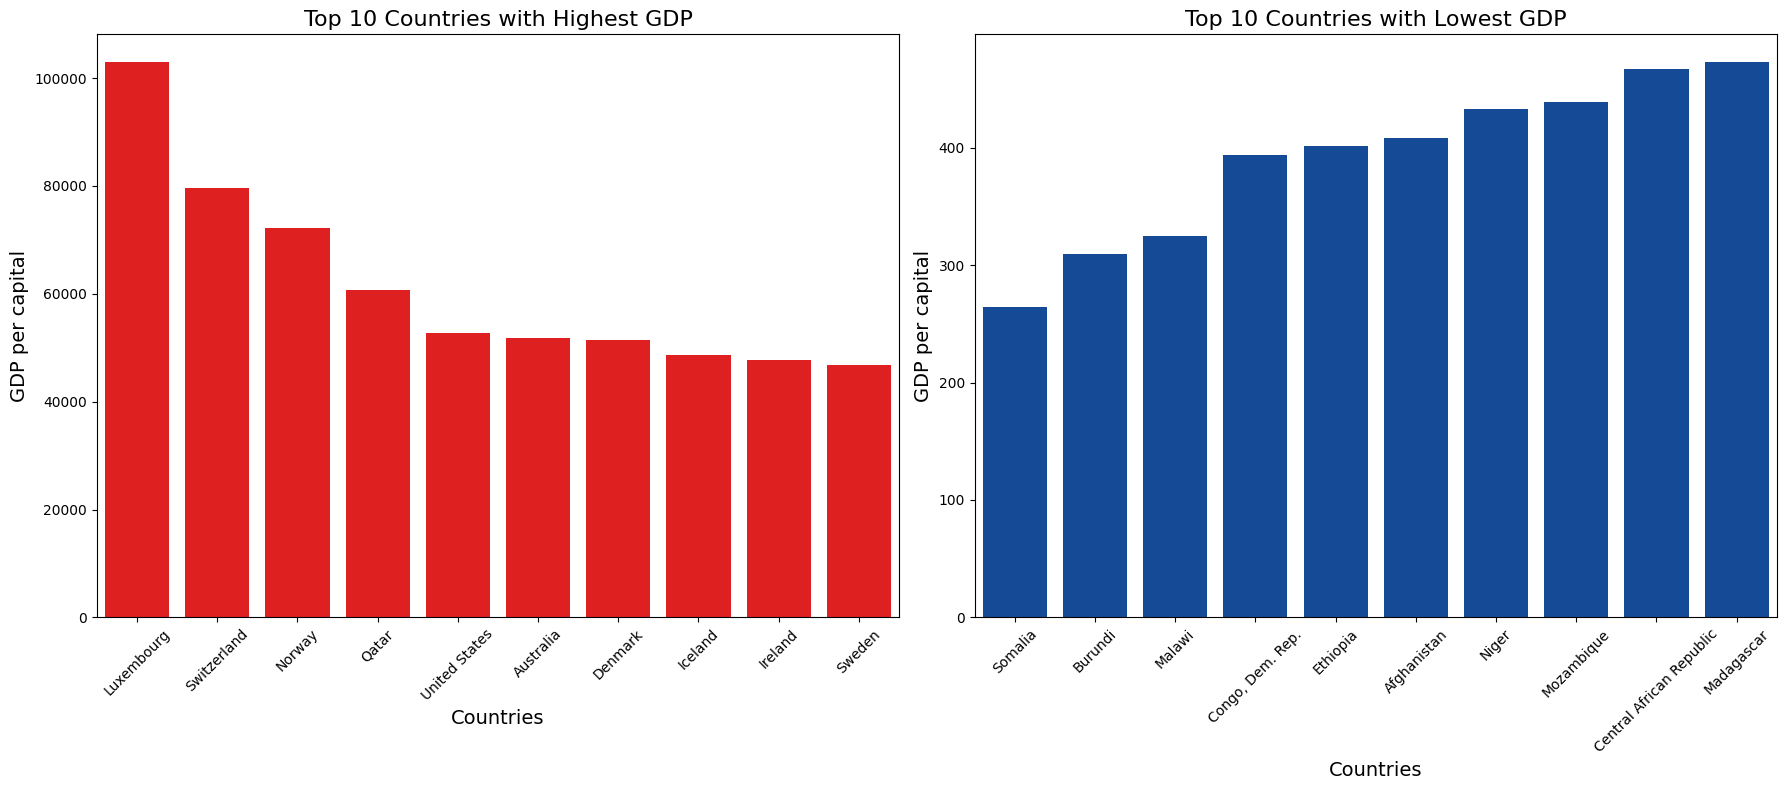

In [34]:
top_10 = df.nlargest(10, 'GDP_per_capital')
top_10_lowest = df.nsmallest(10, 'GDP_per_capital')

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(data=top_10, x='Country', y='GDP_per_capital', color='red', ax=axes[0])
axes[0].set_title('Top 10 Countries with Highest GDP', size=16)
axes[0].set_xlabel('Countries', size=14)
axes[0].set_ylabel('GDP per capital', size=14)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=top_10_lowest, x='Country', y='GDP_per_capital', color='#0047ab' , ax=axes[1])
axes[1].set_title('Top 10 Countries with Lowest GDP', size=16)
axes[1].set_xlabel('Countries', size=14)
axes[1].set_ylabel('GDP per capital', size=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### **Life Expectancy**

### **Regions with Highest and Lowest Life Expectancy**

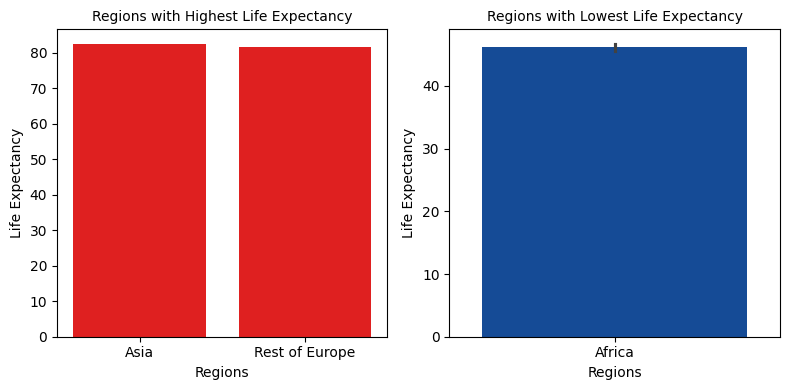

In [35]:
top_3 = df.nlargest(3, 'Life_expectancy')
top_3_lowest = df.nsmallest(3, 'Life_expectancy')

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.barplot(data=top_3, x='Region', y='Life_expectancy', color='red', ax=axes[0])
axes[0].set_title('Regions with Highest Life Expectancy', size=10)
axes[0].set_xlabel('Regions', size=10)
axes[0].set_ylabel('Life Expectancy', size=10)
axes[0].tick_params(axis='x', rotation=0)

sns.barplot(data=top_3_lowest, x='Region', y='Life_expectancy', color='#0047ab', ax=axes[1])
axes[1].set_title('Regions with Lowest Life Expectancy', size=10)
axes[1].set_xlabel('Regions', size=10)
axes[1].set_ylabel('Life Expectancy', size=10)
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### **Top 10 Countries with Highest and Lowest Life Expectancy**

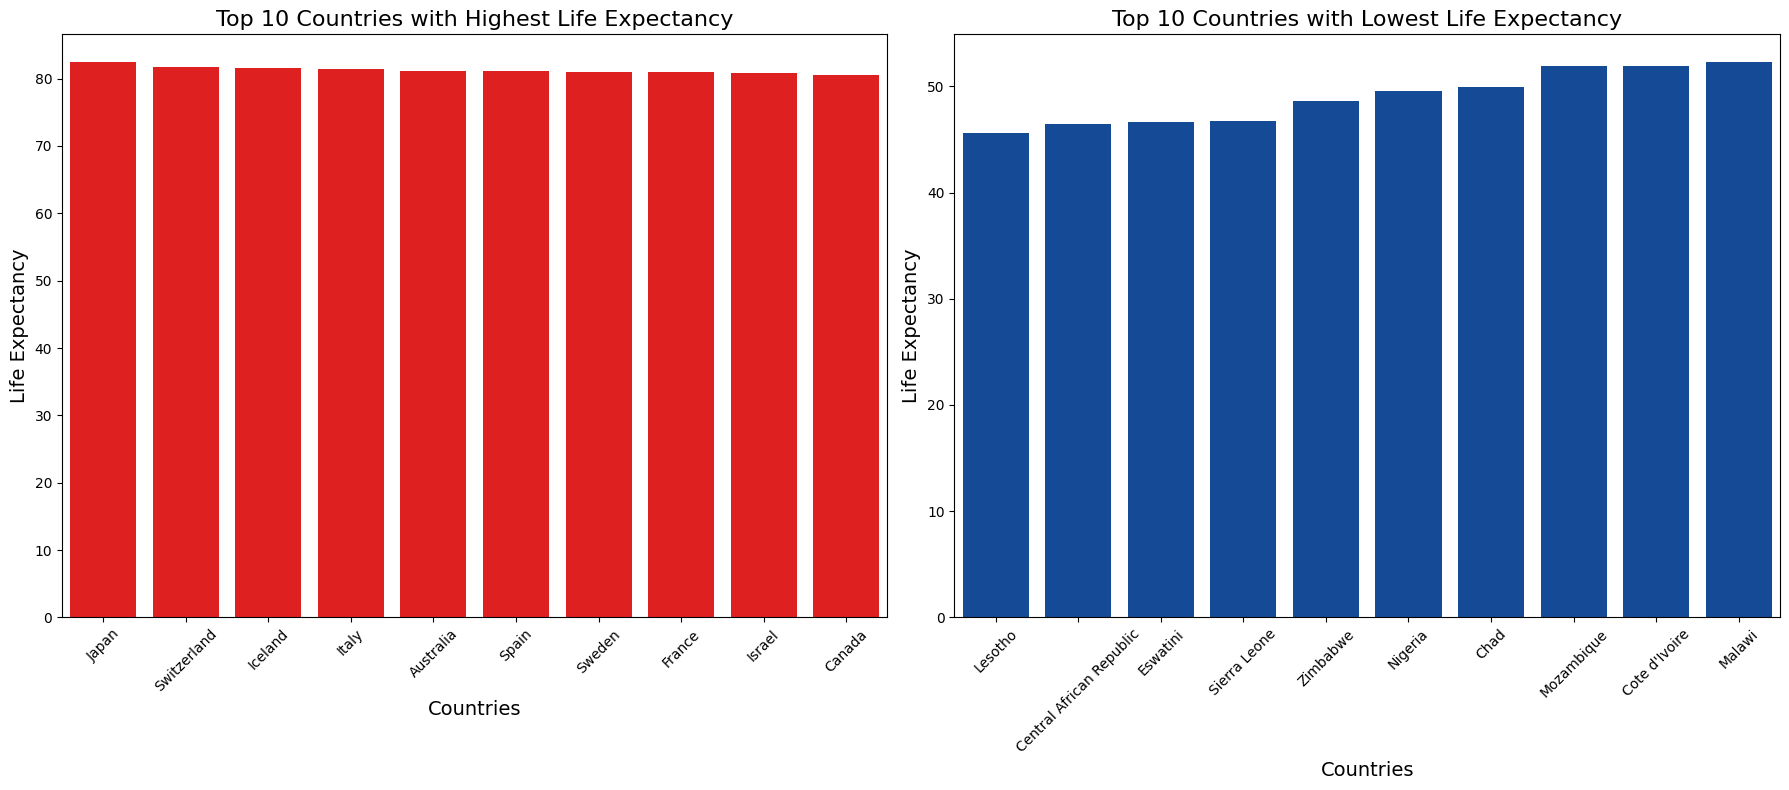

In [36]:
top_10 = df.nlargest(10, 'Life_expectancy')
top_10_lowest = df.nsmallest(10, 'Life_expectancy')

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(data=top_10, x='Country', y='Life_expectancy', color='red', ax=axes[0])
axes[0].set_title('Top 10 Countries with Highest Life Expectancy', size=16)
axes[0].set_xlabel('Countries', size=14)
axes[0].set_ylabel('Life Expectancy', size=14)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=top_10_lowest, x='Country', y='Life_expectancy', color='#0047ab', ax=axes[1])
axes[1].set_title('Top 10 Countries with Lowest Life Expectancy', size=16)
axes[1].set_xlabel('Countries', size=14)
axes[1].set_ylabel('Life Expectancy', size=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### **Distribution of Health Issues Among Worst 10 Countries**

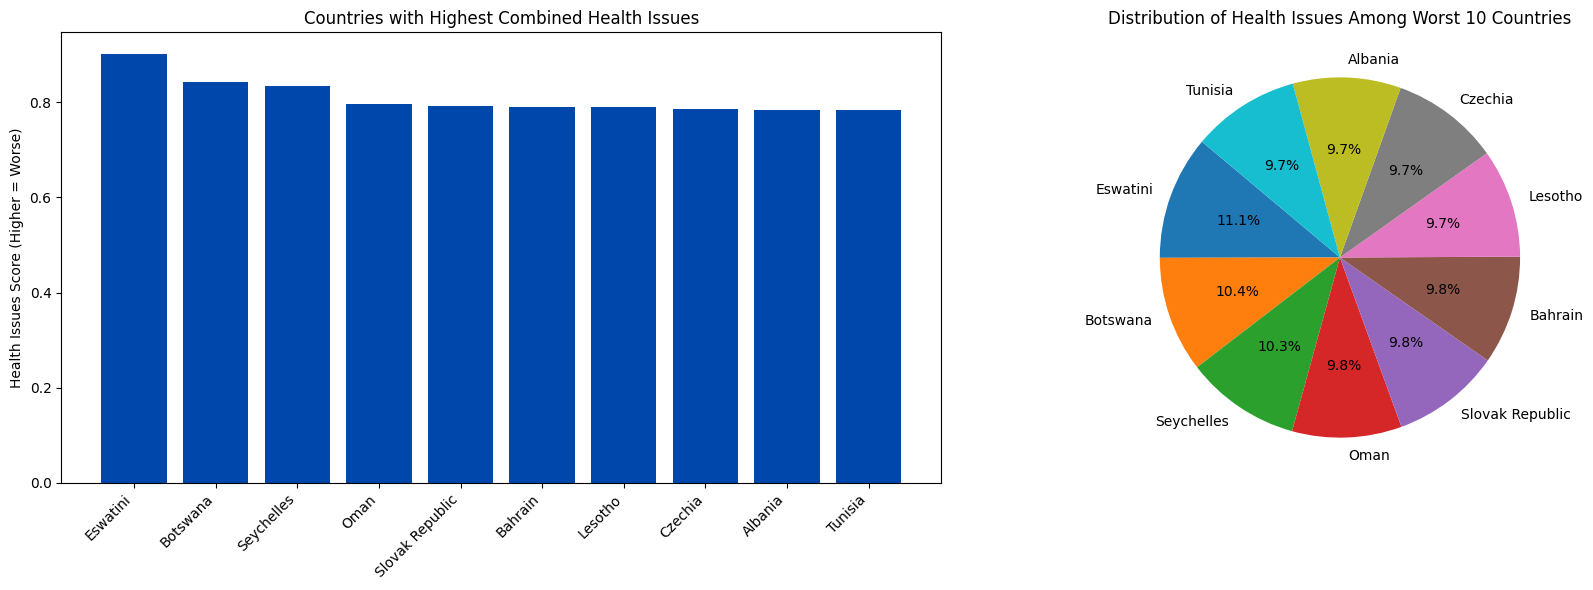

In [37]:
health_cols = ['Measles', 'Incidents_HIV', 'Hepatitis_B', 'Polio', 'Diphtheria']

#normalize health columns
for col in health_cols:
    df[f'{col}_norm'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

#calculate total health issues
df['total_health_issues'] = df[[f'{col}_norm' for col in health_cols]].mean(axis=1)

#get the worst 10 countries
worst_10 = df.nlargest(10, 'total_health_issues')

#create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

#bar plot for total health issues
bars = axs[0].bar(worst_10['Country'], worst_10['total_health_issues'], color='#0047ab')
axs[0].set_xticks(range(len(worst_10['Country'])))
axs[0].set_xticklabels(worst_10['Country'], rotation=45, ha='right')
axs[0].set_title('Countries with Highest Combined Health Issues')
axs[0].set_ylabel('Health Issues Score (Higher = Worse)')

#pie chart for distribution of health issues
axs[1].pie(worst_10['total_health_issues'], labels=worst_10['Country'], autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution of Health Issues Among Worst 10 Countries')

plt.tight_layout()
plt.show()

### **Distribution of Health Issues Among Best 10 Countries**

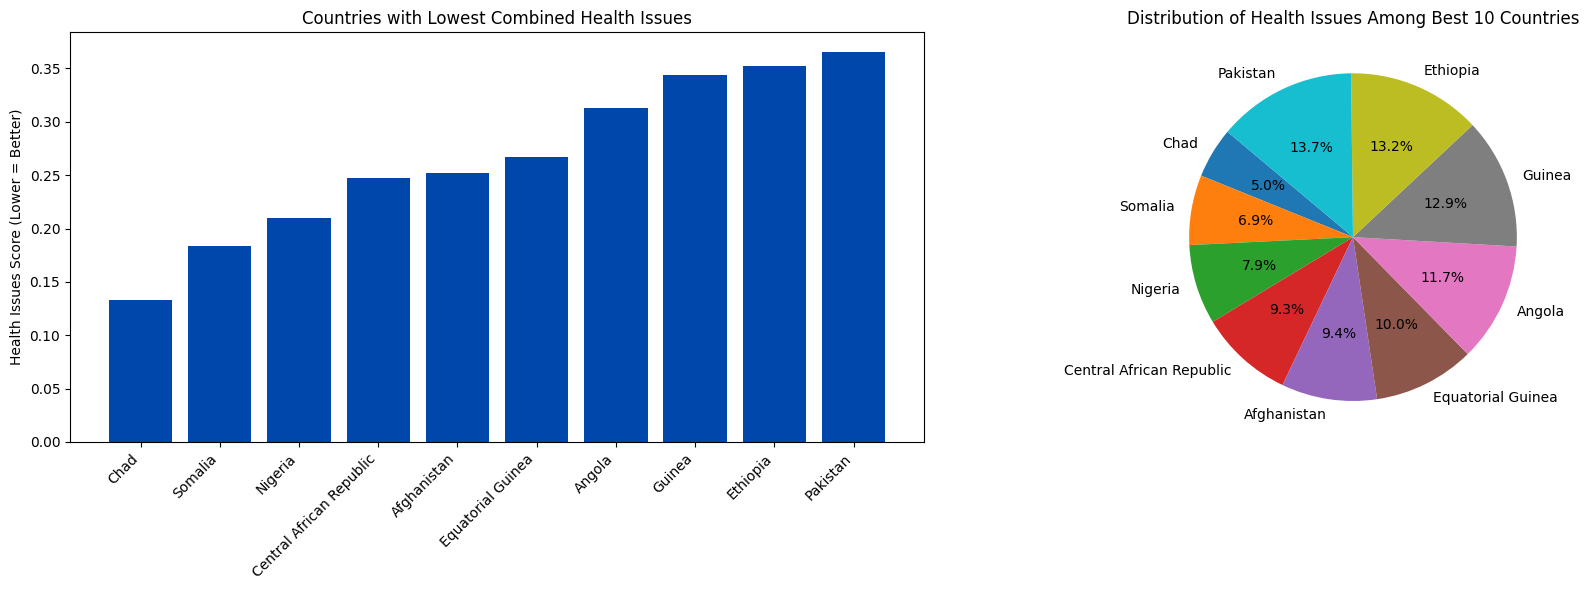

In [38]:
health_cols = ['Measles', 'Incidents_HIV', 'Hepatitis_B', 'Polio', 'Diphtheria']

#normalize health columns
for col in health_cols:
    df[f'{col}_norm'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

#calculate total health issues
df['total_health_issues'] = df[[f'{col}_norm' for col in health_cols]].mean(axis=1)

#get the best 10 countries
best_10 = df.nsmallest(10, 'total_health_issues')

#create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

#bar plot for total health issues
bars = axs[0].bar(best_10['Country'], best_10['total_health_issues'], color='#0047ab')
axs[0].set_xticks(range(len(best_10['Country'])))
axs[0].set_xticklabels(best_10['Country'], rotation=45, ha='right')
axs[0].set_title('Countries with Lowest Combined Health Issues')
axs[0].set_ylabel('Health Issues Score (Lower = Better)')

#pie chart for distribution of health issues
axs[1].pie(best_10['total_health_issues'], labels=best_10['Country'], autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution of Health Issues Among Best 10 Countries')

plt.tight_layout()
plt.show()

### **Distribution of Countries by Economical Status**

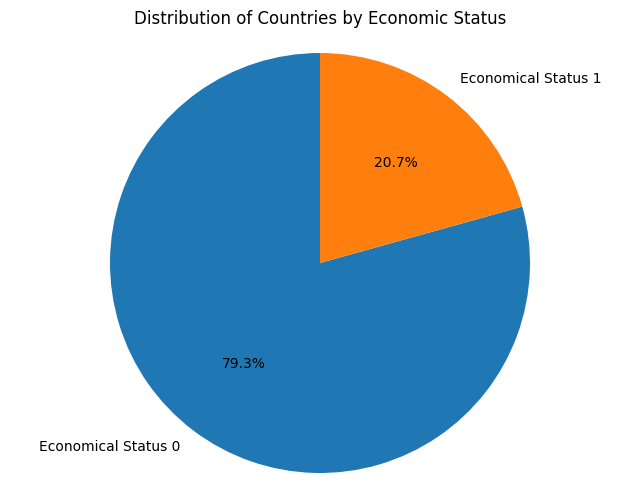

In [39]:

data = {
    'Country': df['Country'],
    'Economy': df['Economy_status']
}

#count the occurrences of each economic status
economy_counts = df['Economy_status'].value_counts()

#create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(economy_counts, labels=['Economical Status 0', 'Economical Status 1'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Countries by Economic Status')
plt.axis('equal') 
plt.show()

### **Top 10 Countries with Highest and Lowest Schooling Scores**

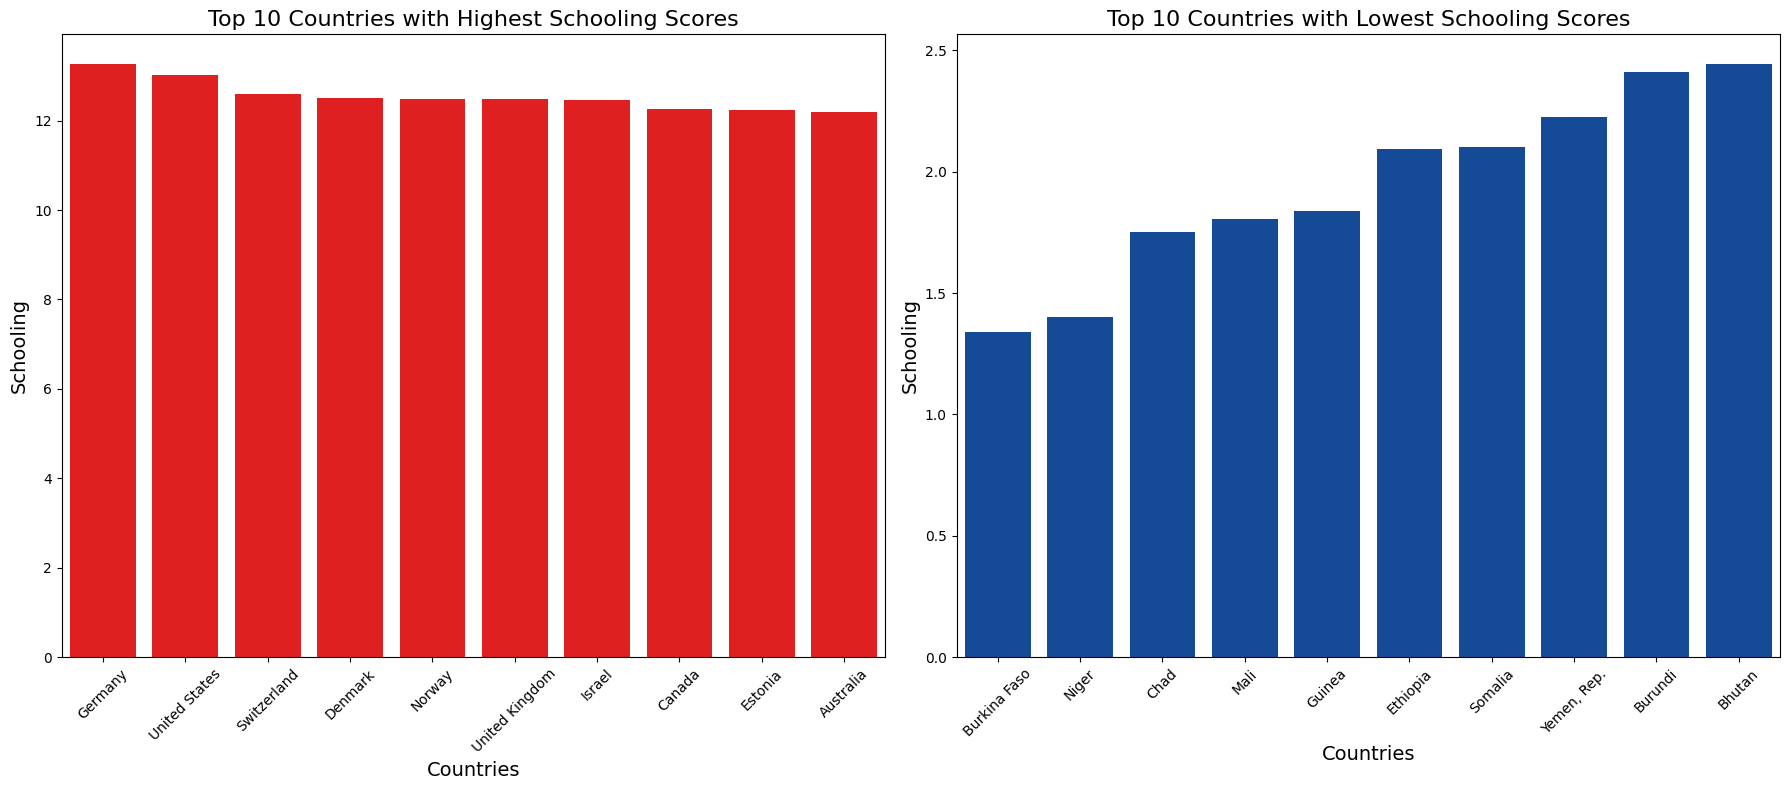

In [40]:
top_10 = df.nlargest(10, 'Schooling')
top_10_lowest = df.nsmallest(10, 'Schooling')

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(data=top_10, x='Country', y='Schooling', color='red', ax=axes[0])
axes[0].set_title('Top 10 Countries with Highest Schooling Scores', size=16)
axes[0].set_xlabel('Countries', size=14)
axes[0].set_ylabel('Schooling', size=14)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=top_10_lowest, x='Country', y='Schooling', color='#0047ab', ax=axes[1])
axes[1].set_title('Top 10 Countries with Lowest Schooling Scores', size=16)
axes[1].set_xlabel('Countries', size=14)
axes[1].set_ylabel('Schooling', size=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### **Distribution of Thinnes Under 19 Years Old Among Best 10 Countries**

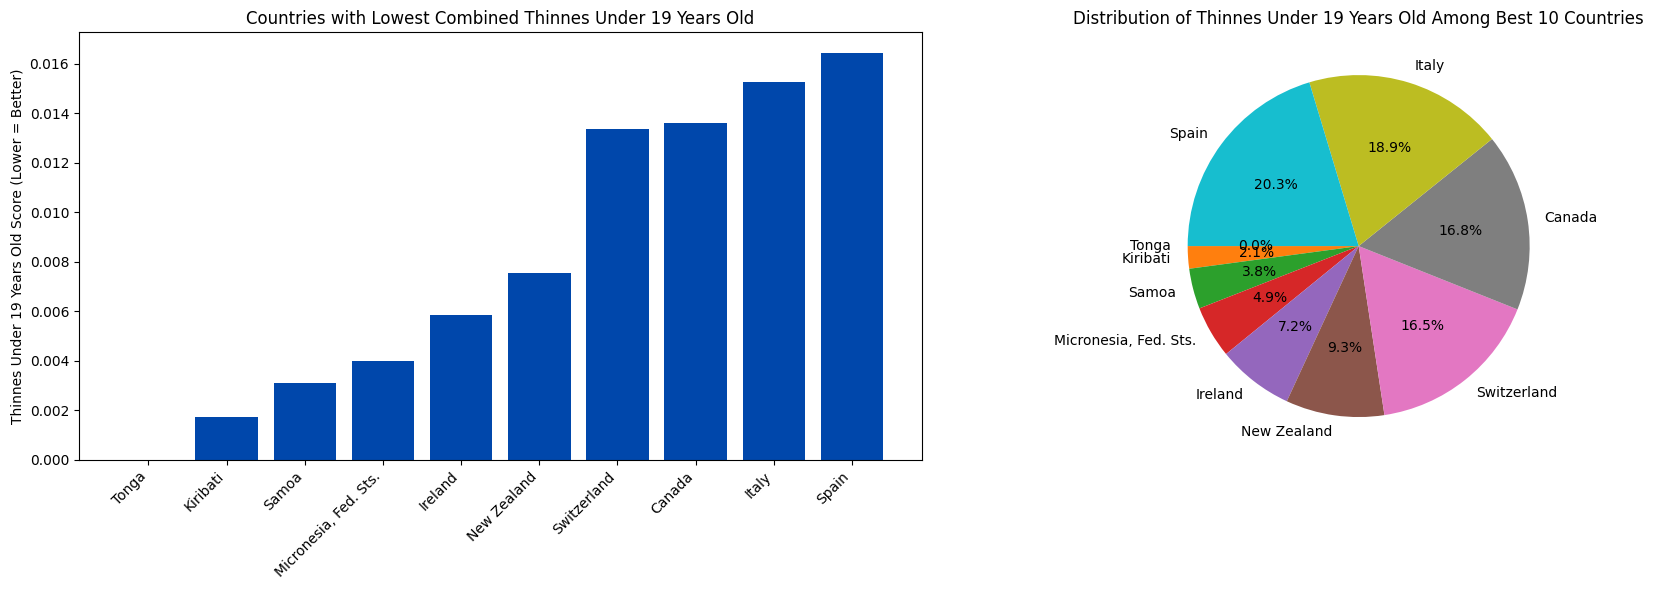

In [41]:
thinnes_under_19_years_old_cols = ['Thinness_ten_nineteen_years', 'Thinness_five_nine_years']

#normalize health columns
for col in thinnes_under_19_years_old_cols:
    df[f'{col}_norm'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

#calculate total health issues
df['total_thinnes_under_19'] = df[[f'{col}_norm' for col in thinnes_under_19_years_old_cols]].mean(axis=1)

#get the best 10 countries
best_10 = df.nsmallest(10, 'total_thinnes_under_19')

#create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

#bar plot for total health issues
bars = axs[0].bar(best_10['Country'], best_10['total_thinnes_under_19'], color='#0047ab')
axs[0].set_xticks(range(len(best_10['Country'])))
axs[0].set_xticklabels(best_10['Country'], rotation=45, ha='right')
axs[0].set_title('Countries with Lowest Combined Thinnes Under 19 Years Old')
axs[0].set_ylabel('Thinnes Under 19 Years Old Score (Lower = Better)')

#pie chart for distribution of health issues
axs[1].pie(best_10['total_thinnes_under_19'], labels=best_10['Country'], autopct='%1.1f%%', startangle=180)
axs[1].set_title('Distribution of Thinnes Under 19 Years Old Among Best 10 Countries')

plt.tight_layout()
plt.show()

### **Distribution of Thinnes Under 19 Years Old Score Among Worst 10 Countries**

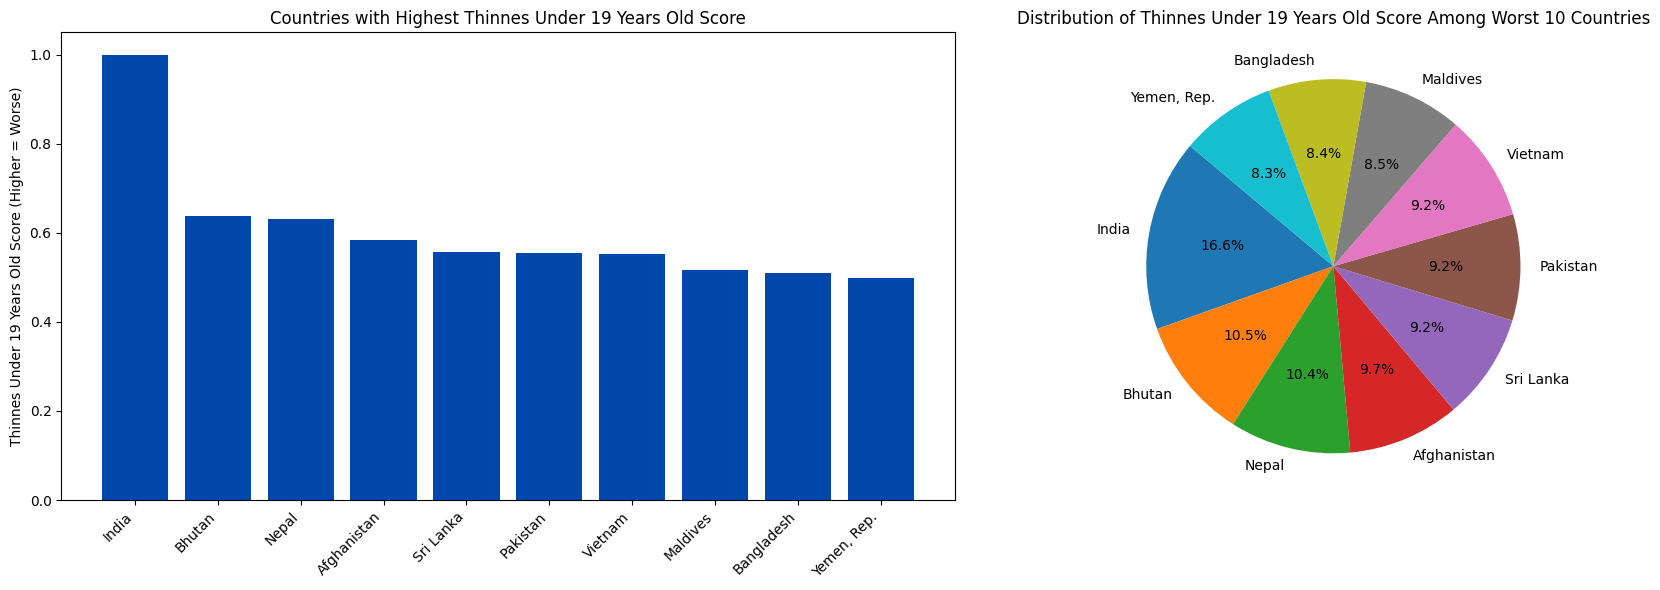

In [42]:
thinnes_under_19_years_old_cols = ['Thinness_ten_nineteen_years', 'Thinness_five_nine_years']

#normalize health columns
for col in thinnes_under_19_years_old_cols:
    df[f'{col}_norm'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

#calculate total health issues
df['total_thinnes_under_19'] = df[[f'{col}_norm' for col in thinnes_under_19_years_old_cols]].mean(axis=1)

#get the worst 10 countries
worst_10 = df.nlargest(10, 'total_thinnes_under_19')

#create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

#bar plot for total health issues
bars = axs[0].bar(worst_10['Country'], worst_10['total_thinnes_under_19'], color='#0047ab')
axs[0].set_xticks(range(len(worst_10['Country'])))
axs[0].set_xticklabels(worst_10['Country'], rotation=45, ha='right')
axs[0].set_title('Countries with Highest Thinnes Under 19 Years Old Score')
axs[0].set_ylabel('Thinnes Under 19 Years Old Score (Higher = Worse)')

#pie chart for distribution of health issues
axs[1].pie(worst_10['total_thinnes_under_19'], labels=worst_10['Country'], autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution of Thinnes Under 19 Years Old Score Among Worst 10 Countries')

plt.tight_layout()
plt.show()

### **Identify the dependencies**

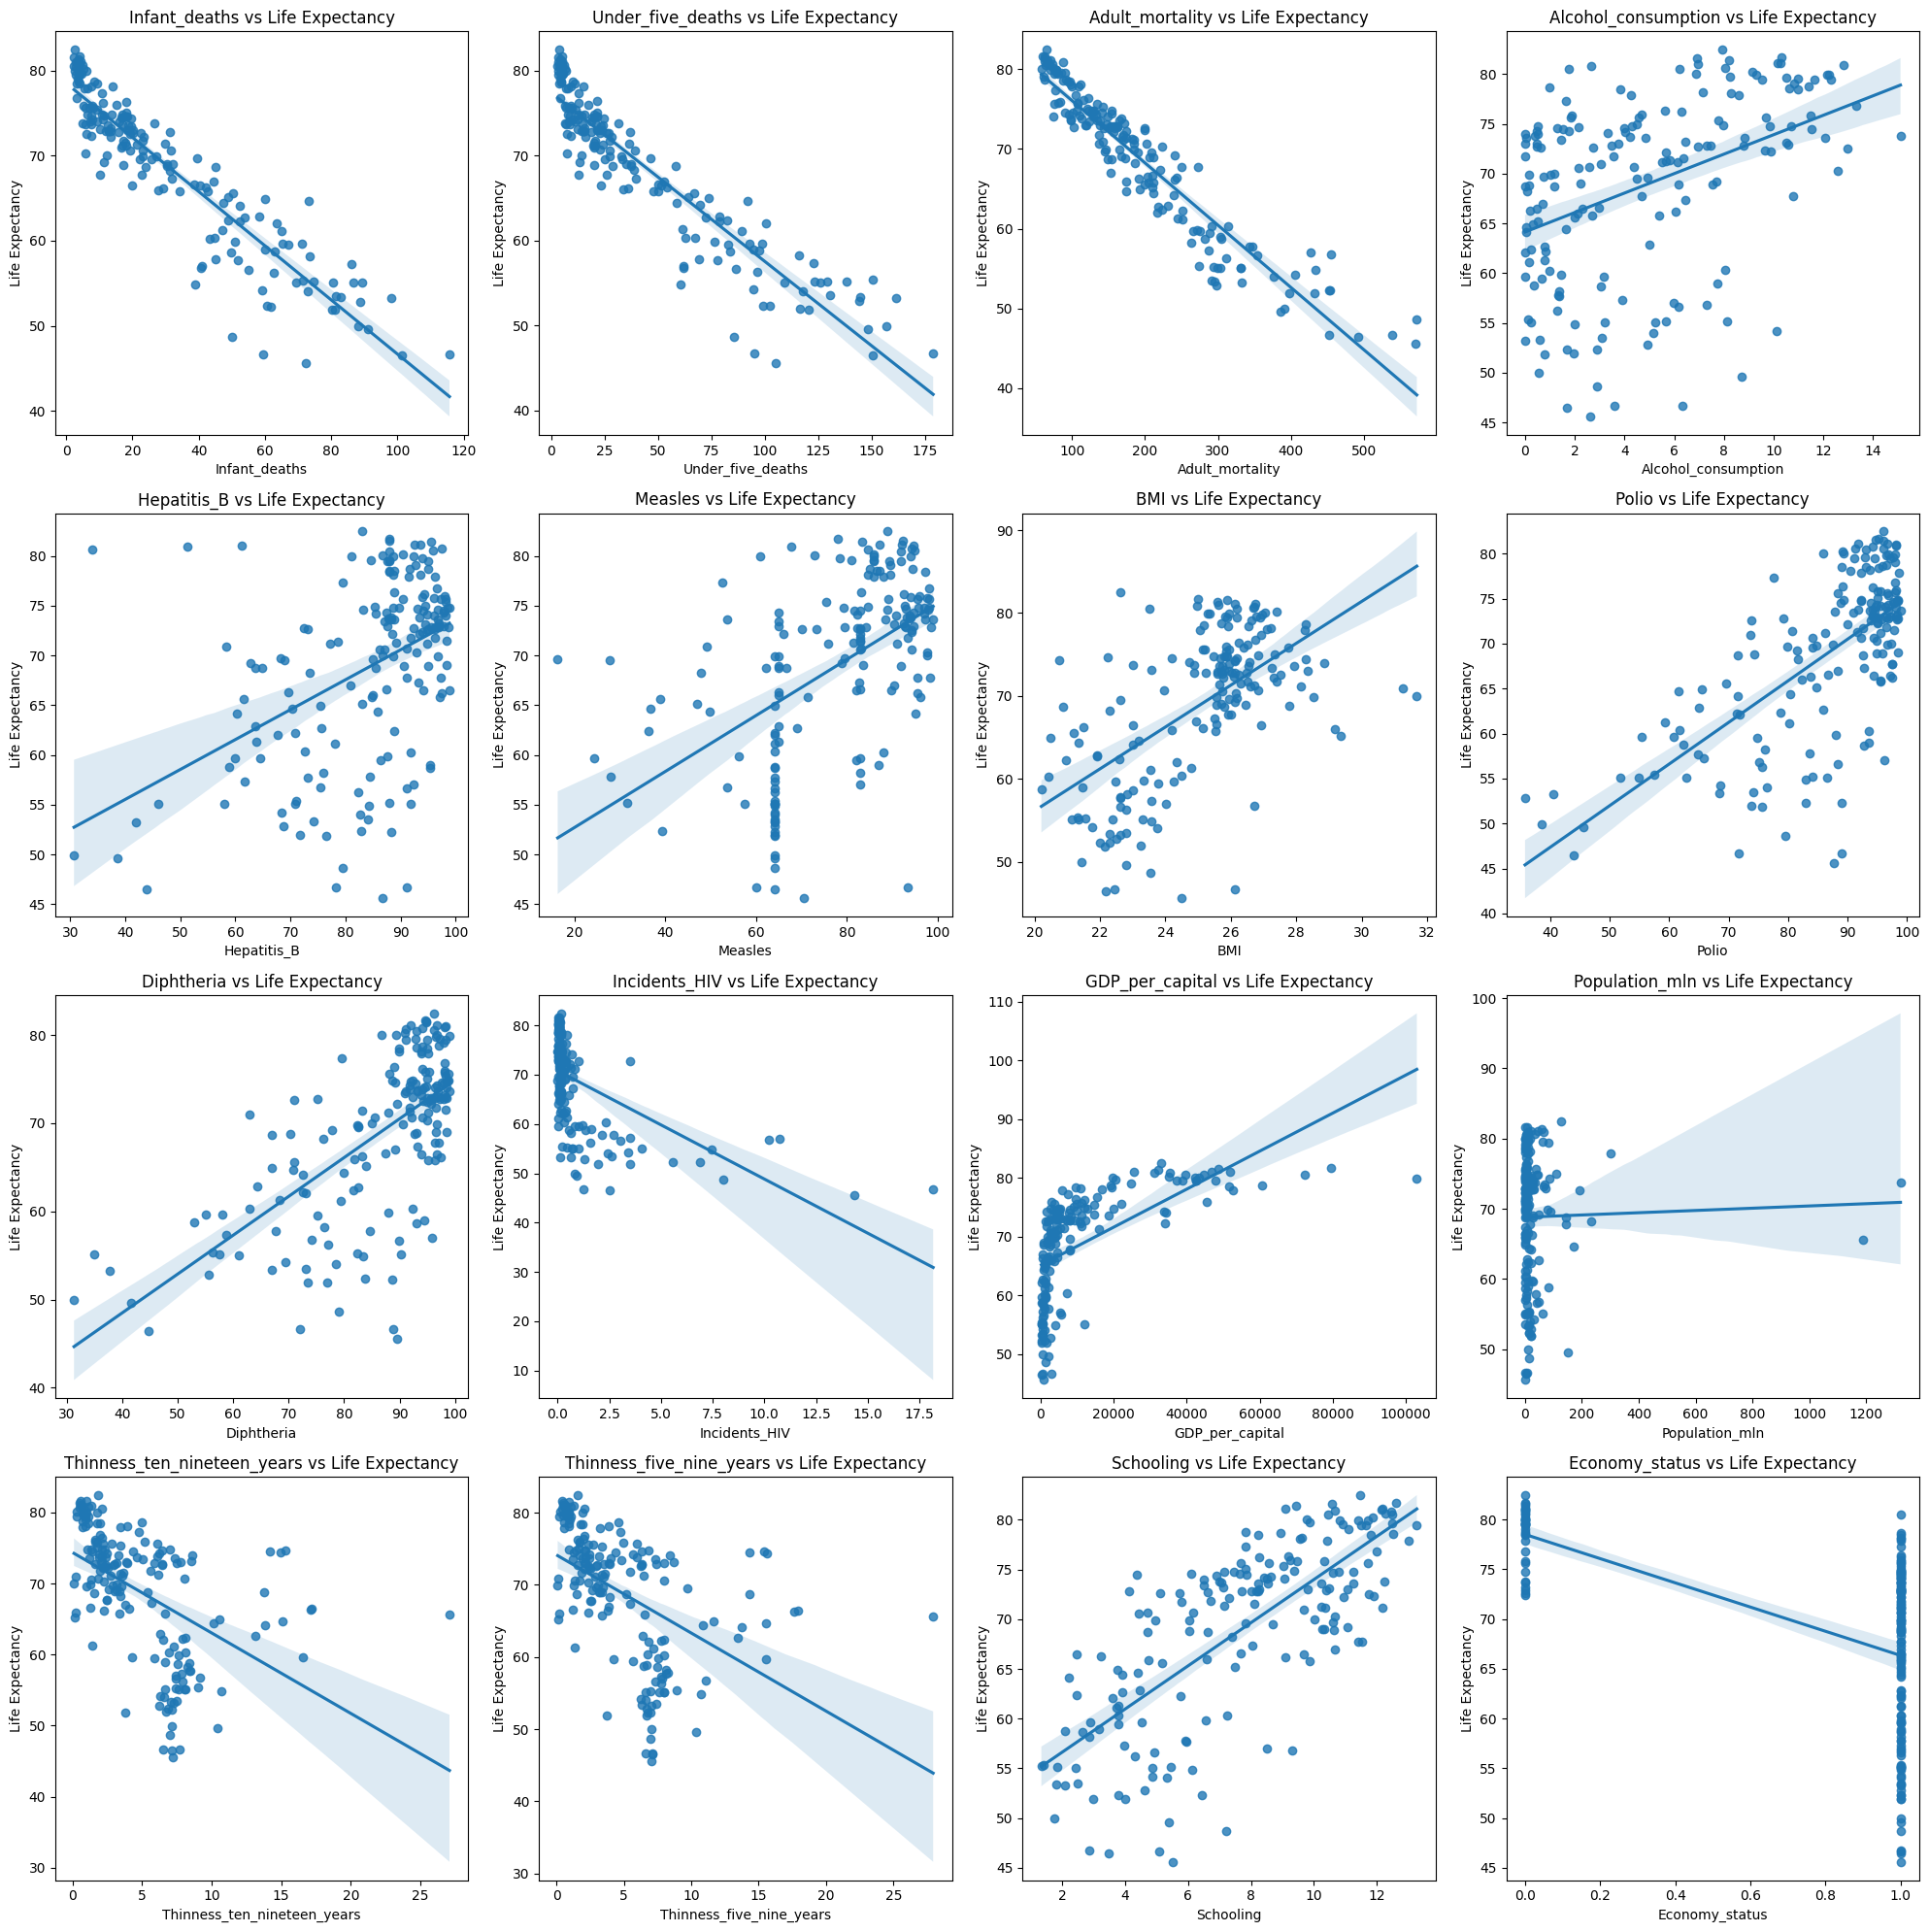

In [ ]:
import matplotlib.pyplot as plt             #type:ignore
import seaborn as sns                       #type: ignore                                                                                                                                                                                                                                                                                                                                   #type:ignore

plt.figure(figsize=(20, 20))

#list of variables to plot against Life Expectancy
variables = [
    'Infant_deaths',
    'Under_five_deaths',
    'Adult_mortality',
    'Alcohol_consumption',
    'Hepatitis_B',
    'Measles',
    'BMI',
    'Polio',
    'Diphtheria',
    'Incidents_HIV',
    'GDP_per_capital',
    'Population_mln',
    'Thinness_ten_nineteen_years',
    'Thinness_five_nine_years',
    'Schooling',
    'Economy_status'
]

#loop through the variables and create a subplot for each
for i, var in enumerate(variables, start=1):
    plt.subplot(4, 4, i)  # Create a 4x4 grid of subplots
    sns.regplot(x=df[var], y=df['Life_expectancy'])
    plt.xlabel(var)
    plt.ylabel('Life Expectancy')
    plt.title(f'{var} vs Life Expectancy')

plt.tight_layout()

plt.show()

### **Correlation Matrix**

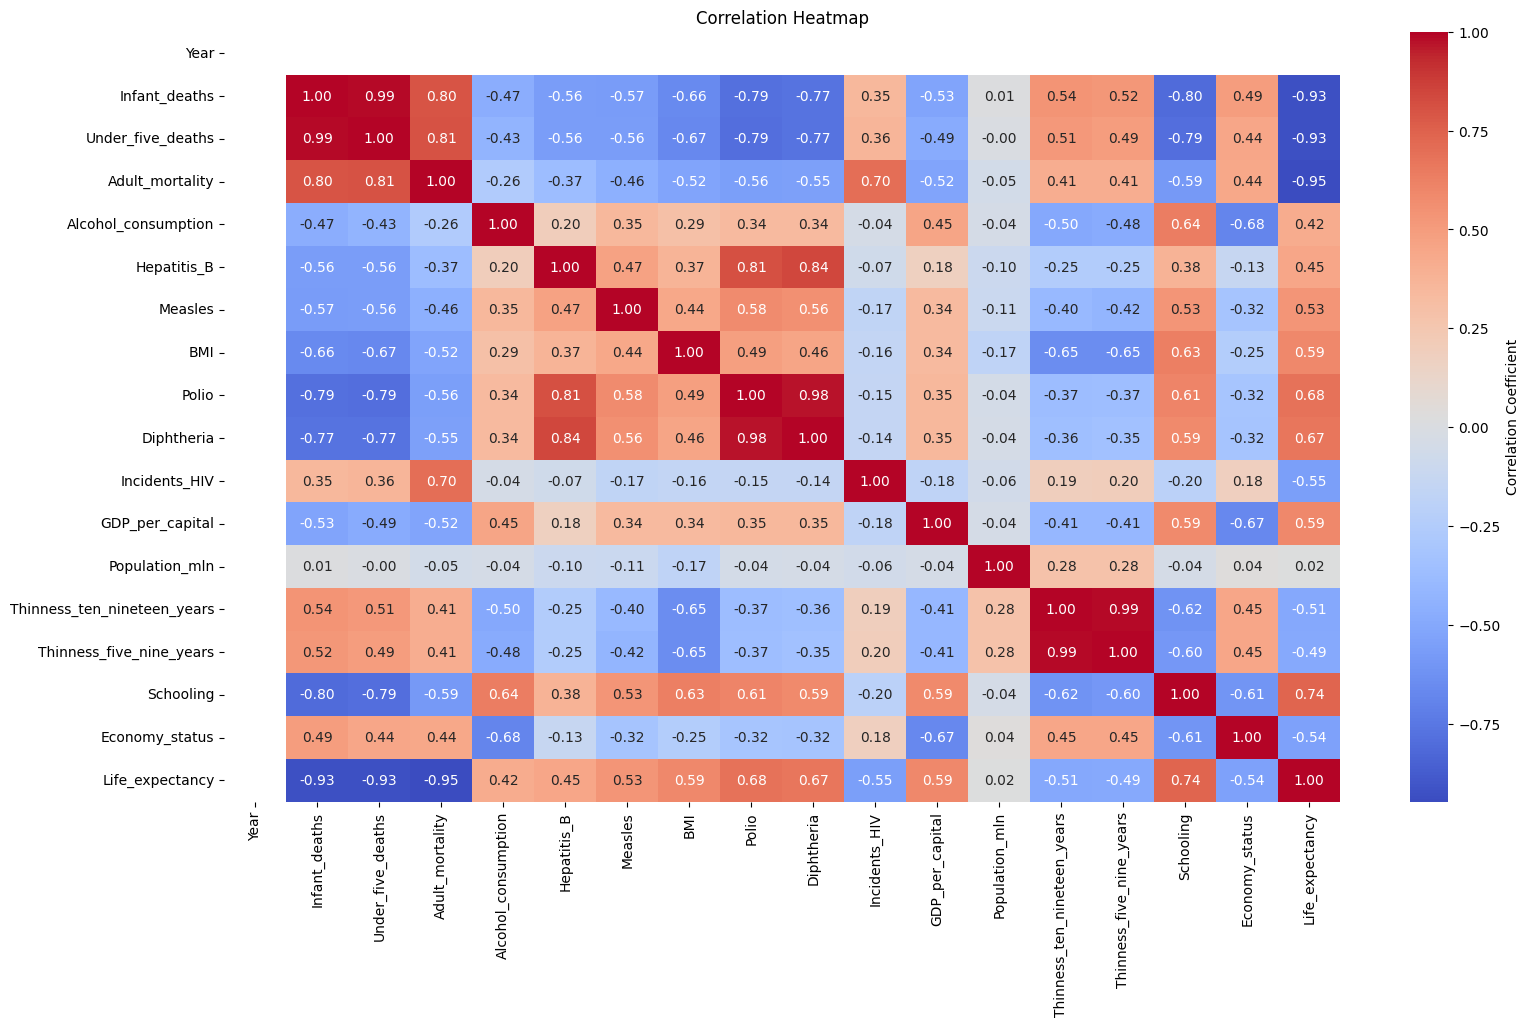

In [44]:
df = pd.read_csv(r"C:\Users\Perdorues\Downloads\Project_Datasets\Life-Expectancy-Data-Averaged.csv")

#select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap')
plt.show()

### **Life Expectancy Analysis with Predictive Machine Learning Modeling**

#### **Drop the variable we want to use as prediction target**

In [45]:
x = numeric_df.drop(columns='Life_expectancy', axis=1)
x

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capital,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status
0,2007.5,71.08125,98.61250,265.80497,0.01613,64.5625,24.3750,22.46250,55.3750,55.1250,0.02250,408.5625,27.45063,16.58125,15.58125,2.90000,1
1,2007.5,15.25625,17.14375,83.13297,4.69688,98.0000,95.9375,25.85625,98.1250,98.0625,0.02563,3071.1250,2.96938,1.61875,1.70000,9.24375,1
2,2007.5,26.75625,31.19375,113.43928,0.40063,88.3125,93.2500,24.86875,91.7500,91.8750,0.02188,3745.1250,34.82063,6.09375,5.97500,6.99375,1
3,2007.5,88.76875,144.16250,297.84406,4.93563,68.8125,64.0000,22.51875,35.7500,55.5625,1.30375,2647.8125,21.62375,6.19375,6.66875,4.60625,1
4,2007.5,9.47500,11.51875,142.47881,7.75500,98.2500,75.4375,25.85000,96.9375,98.3125,0.12500,14678.7500,0.08500,3.42500,3.37500,9.01875,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,2007.5,15.85000,18.50000,151.05616,7.45813,72.4375,83.0000,26.49375,79.1875,75.2500,0.40000,9294.8750,27.39250,1.65000,1.56250,8.23750,1
175,2007.5,19.50000,24.47500,133.05441,1.74250,87.4375,65.0000,20.76250,94.9375,91.7500,0.19688,1807.8750,86.03250,14.92500,15.62500,6.90000,1
176,2007.5,52.44375,69.57500,239.65394,0.04700,60.1875,95.0000,23.02500,71.6250,72.6250,0.02500,2406.8125,21.73063,13.83125,13.75000,2.22500,1
177,2007.5,60.58125,99.20625,452.76122,2.90313,82.8750,39.1875,22.00000,82.9375,83.8125,6.86813,1059.8750,12.86250,6.88125,6.76250,6.43750,1


### **Turn 'Life_expectancy' variable into a target variable**

In [46]:
y = df['Life_expectancy']
y

0      59.65625
1      75.95000
2      73.78750
3      52.82500
4      75.35000
         ...   
174    72.79375
175    74.33125
176    64.16250
177    52.33125
178    48.66250
Name: Life_expectancy, Length: 179, dtype: float64

### **Preparing data for modeling**

### **Standartize the data**

In [47]:
from sklearn.preprocessing import StandardScaler                     #type: ignore
from sklearn.metrics import mean_squared_error, r2_score             #type: ignore
from sklearn.model_selection import train_test_split                 #type: ignore
import xgboost as xgb                                                #type: ignore
from numpy.polynomial.polynomial import Polynomial                   #type: ignore
from sklearn.model_selection import cross_val_score                  #type: ignore
from sklearn.model_selection import GridSearchCV                     #type: ignore


In [48]:
df = pd.read_csv(r"C:\Users\Perdorues\Downloads\Project_Datasets\Life-Expectancy-Data-Averaged.csv")

df = numeric_df

#prepare the data for regression: split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#build the model using XGBoost Regressor
regressor = xgb.XGBRegressor(
    #adjust hyperparameters
    n_estimators=100, 
    learning_rate=0.1, #we need a learning rate between 0.1 and 0.3
    max_depth=6,
    colsample_bytree=0.8,
    subsample=0.8,
    reg_alpha=1,  # L1 regularization
    reg_lambda=1  # L2 regularization
)
regressor.fit(x_train_scaled, y_train)

#make predictions
y_train_pred = regressor.predict(x_train_scaled)
y_test_pred = regressor.predict(x_test_scaled)

#calculate MSE and R² for training and testing
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

#results of the regression
print("Training Mean Squared Error (MSE):", train_mse)
print("Testing Mean Squared Error (MSE):", test_mse)
print("Training R-squared (R²):", train_r2)
print("Testing R-squared (R²):", test_r2)

#check for overfitting or underfitting
threshold_value = 0.20 * train_mse  # 20% of the training error
if (test_mse - train_mse) > threshold_value:
    print("Model could be overfit.")
elif train_mse > threshold_value and test_mse > threshold_value:
    print("Model could be underfit.")
else:
    print("Model could be in good balance.")

Training Mean Squared Error (MSE): 0.02132530951287534
Testing Mean Squared Error (MSE): 2.6395550361341327
Training R-squared (R²): 0.9997421330525201
Testing R-squared (R²): 0.9706027715617338
Model could be overfit.


### **Make predictions**

In [49]:

#make predictions on the entire dataset for comparison
x_scaled = scaler.transform(x)  #scale the entire dataset
y_predicted = regressor.predict(x_scaled)  #predict using the trained model

#create a new DataFrame to show actual vs predicted values
df_results = numeric_df.copy()

df_results["Predicted Life Expectancy"] = y_predicted
df_results["Actual Life Expectancy"] = df['Life_expectancy']

#display the results
print("\nRezultatet: Cmimi i Parashikuar vs Actual Life Expectancy")
print(df_results[["Actual Life Expectancy", "Predicted Life Expectancy"]])


Rezultatet: Cmimi i Parashikuar vs Actual Life Expectancy
     Actual Life Expectancy  Predicted Life Expectancy
0                  59.65625                  59.770943
1                  75.95000                  75.909401
2                  73.78750                  73.588982
3                  52.82500                  52.997066
4                  75.35000                  75.245445
..                      ...                        ...
174                72.79375                  72.977982
175                74.33125                  74.294197
176                64.16250                  64.192657
177                52.33125                  52.223484
178                48.66250                  48.703606

[179 rows x 2 columns]


### **Scatter plot of Actual vs Predicted Life Expectancy**

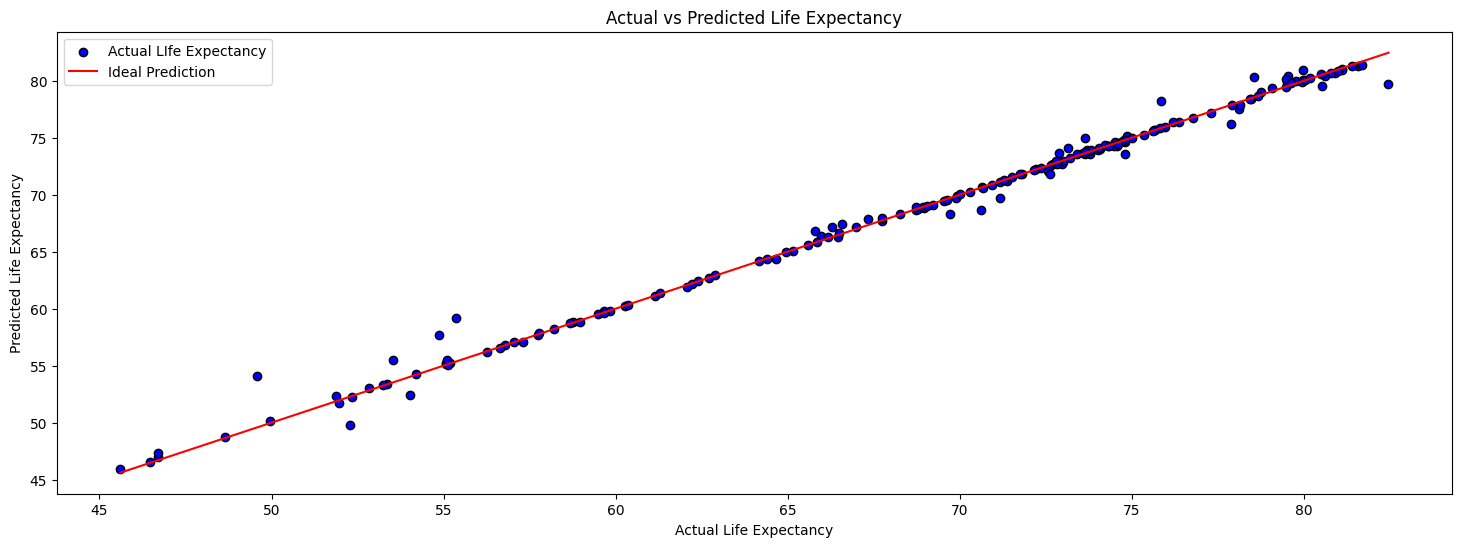

In [50]:
plt.figure(figsize=(18, 6))

plt.scatter(df_results["Actual Life Expectancy"], df_results["Predicted Life Expectancy"], 
        label="Actual LIfe Expectancy", edgecolor='black', color='blue', alpha=1)

plt.plot([min(df_results['Actual Life Expectancy']), max(df_results['Actual Life Expectancy'])],
        [min(df_results['Actual Life Expectancy']), max(df_results['Actual Life Expectancy'])],
        color='red', linestyle='-', label="Ideal Prediction")

plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Life Expectancy")
plt.legend()
plt.show()

### **Distribution of predicted Life Expectancy**

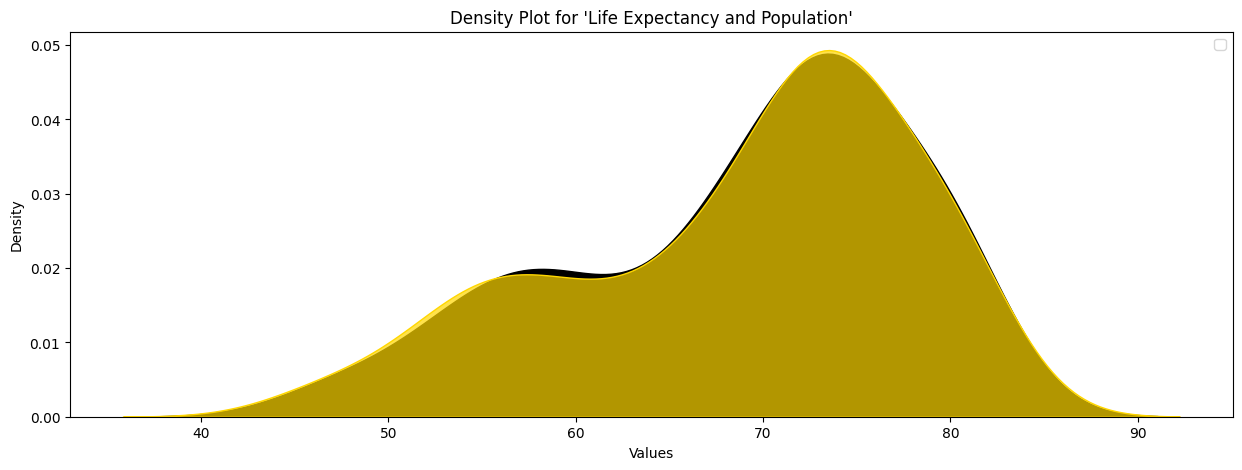

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

sns.kdeplot(data=df_results, x="Predicted Life Expectancy", label="", color='black', alpha=1, fill=True)
sns.kdeplot(data=df_results, x="Actual Life Expectancy", label="", color='gold', alpha=0.7, fill=True)

plt.title("Density Plot for 'Life Expectancy and Population'")

plt.xlabel("Values")
plt.ylabel("Density")

plt.legend()
plt.show()

### **Add Predicted Life Expectancy scores to the results DataFrame**

In [52]:
df_results["Predicted Life Expectancy"] = y_predicted

#display the predicted prices
print("\nRezultatet: Predicted Life Expectancy")
print(df_results["Predicted Life Expectancy"])


Rezultatet: Predicted Life Expectancy
0      59.770943
1      75.909401
2      73.588982
3      52.997066
4      75.245445
         ...    
174    72.977982
175    74.294197
176    64.192657
177    52.223484
178    48.703606
Name: Predicted Life Expectancy, Length: 179, dtype: float32


### **Scatter plot of Predicted vs Actual Life Expectancy**

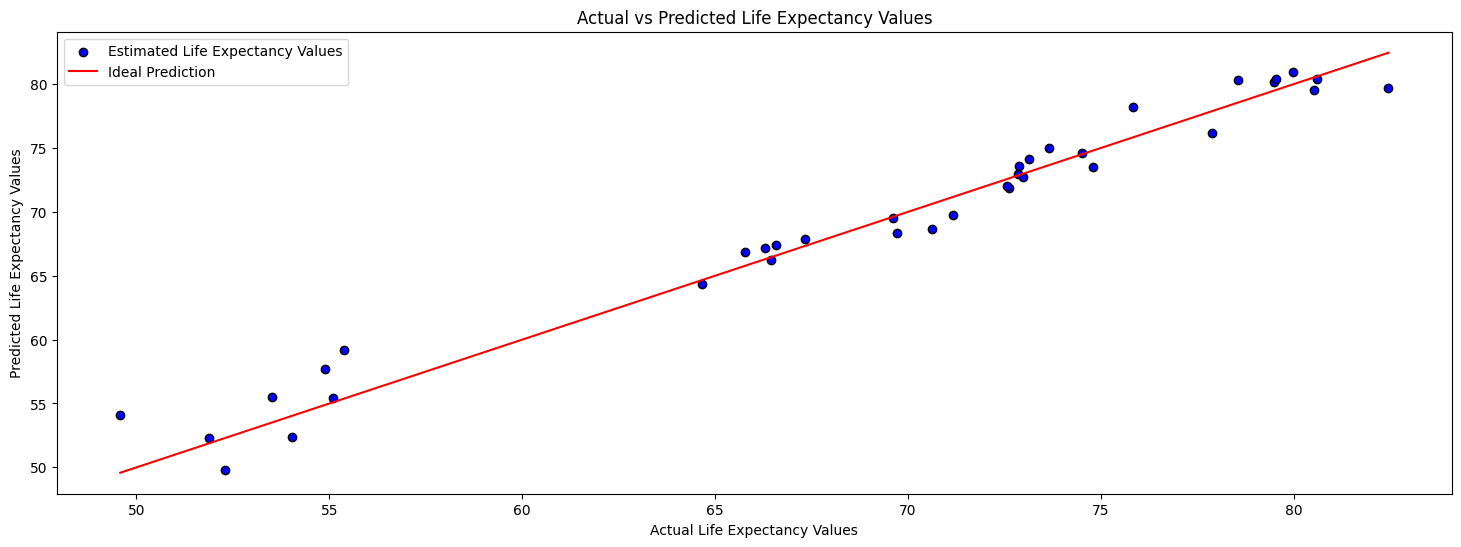

In [53]:
plt.figure(figsize=(18, 6))
plt.scatter(y_test, y_test_pred, label="Estimated Life Expectancy Values", edgecolor='black', color='blue', alpha=1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', label='Ideal Prediction')
plt.xlabel("Actual Life Expectancy Values")
plt.ylabel("Predicted Life Expectancy Values")
plt.title("Actual vs Predicted Life Expectancy Values")
plt.legend()
plt.show()

### **Feature importance**

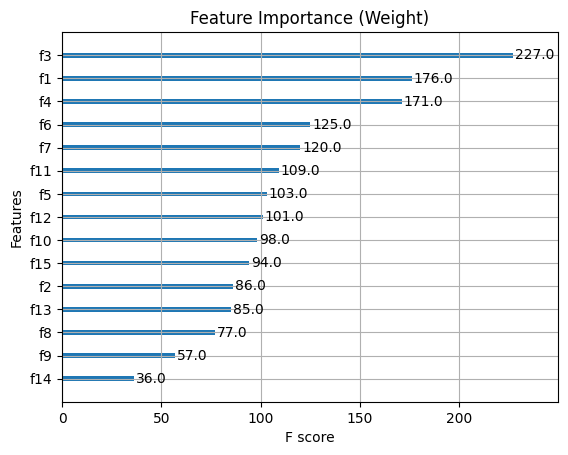

                        Feature  Importance
2             Under_five_deaths    0.821672
3               Adult_mortality    0.070864
1                 Infant_deaths    0.067428
11              GDP_per_capital    0.019424
10                Incidents_HIV    0.005961
13  Thinness_ten_nineteen_years    0.003147
4           Alcohol_consumption    0.002486
8                         Polio    0.001517
15                    Schooling    0.001467
5                   Hepatitis_B    0.001400
12               Population_mln    0.001374
14     Thinness_five_nine_years    0.001148
6                       Measles    0.000784
7                           BMI    0.000716
9                    Diphtheria    0.000611
0                          Year    0.000000
16               Economy_status    0.000000


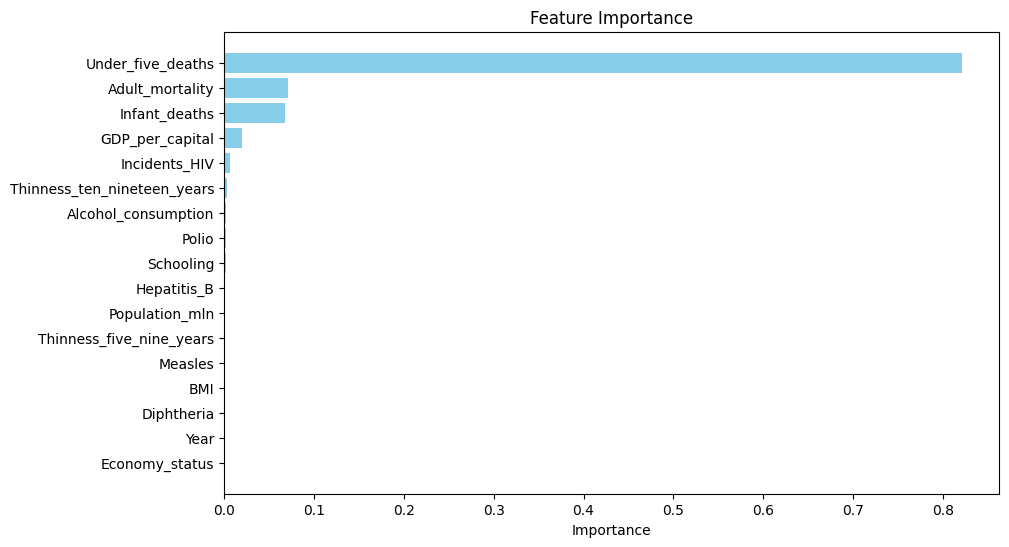

In [87]:
import pandas as pd                                    #type:ignore
import numpy as np                                     #type:ignore
import matplotlib.pyplot as plt                        #type:ignore
import xgboost as xgb                                  #type:ignore

xgb.plot_importance(regressor, max_num_features=20, importance_type="weight")
plt.title("Feature Importance (Weight)")
plt.show()

importance = regressor.feature_importances_
feature_names = numeric_df.columns[:len(importance)]

#create the DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

print(feature_importance_df)

#plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  #invert y-axis to have the most important feature on top
plt.show()

### **Residuals Distribution**

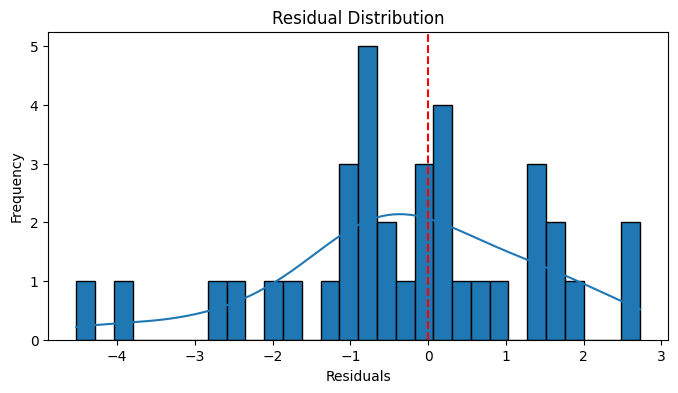

In [55]:
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, edgecolor='black', alpha=1, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--')
plt.show()

### **The residuals appear roughly symmetric around 0, which is a good sign. This suggests that the model does not systematically overpredict or underpredict for most of the data.**

### **We can even test the normality of our residuals using a normality test, such as the Shapiro-Wilk test:**

In [56]:
from scipy.stats import shapiro                            #type:ignore
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p}")

Shapiro-Wilk Test Statistic: 0.9728239869743194, p-value: 0.5075685200285494


### **Test Statistic (W): The value of the test statistic (0.9728) is close to 1, which suggests that the data may be normally distributed. In the Shapiro-Wilk test, a value of W close to 1 indicates that the sample distribution is similar to a normal distribution.**

### **P-value: The p-value (0.5076) is much greater than the common significance level thresholds (e.g., 0.05 or 0.01). A high p-value indicates that there is not enough evidence to reject the null hypothesis, which states that the data is normally distributed.**

### **Cross-validation MSE scores**

In [57]:
cv_scores = cross_val_score(
    regressor, x_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5
)
print("Cross-Validation MSE:", -np.mean(cv_scores))

Cross-Validation MSE: 2.9762336441840667


### **The model appears to be performing well, as the predicted values are closely aligned with the actual values, and the MSE of 2.9762 suggests that the average prediction error is relatively small compared to the range of life expectancy values.**

### **Boxplot of Predicted Life Expectancy scores**

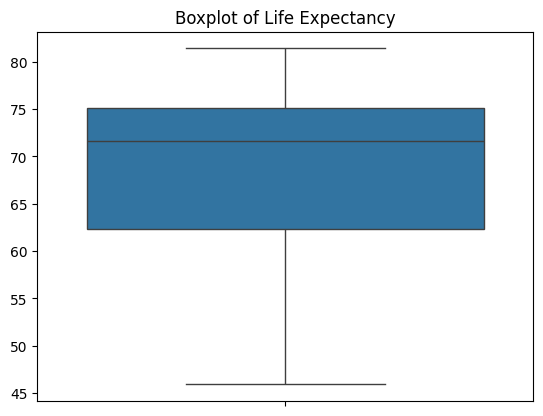

In [58]:
sns.boxplot(y_predicted)
plt.title("Boxplot of Life Expectancy")
plt.show()

### **Confusion Matrix**

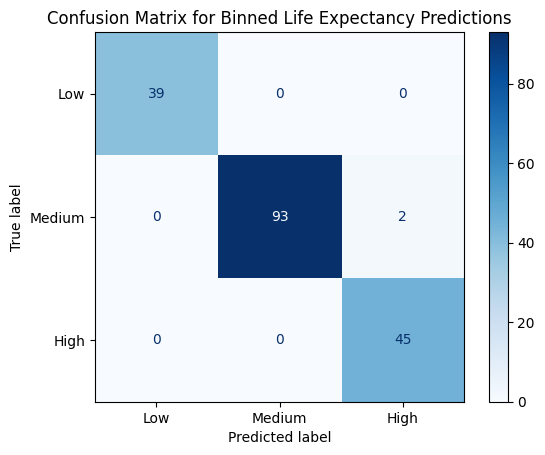

In [59]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

bins = [0, 60, 75, np.inf]  #adjust these bins as necessary
labels = ['Low', 'Medium', 'High']

#bin actual and predicted values
df_results['Actual_Binned'] = pd.cut(df_results['Actual Life Expectancy'], bins=bins, labels=labels, right=False)
df_results['Predicted_Binned'] = pd.cut(df_results['Predicted Life Expectancy'], bins=bins, labels=labels, right=False)

#create confusion matrix
cm = confusion_matrix(df_results['Actual_Binned'], df_results['Predicted_Binned'], labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Binned Life Expectancy Predictions')
plt.show()

**This confusion matrix evaluates the performance of a classification model that predicts binned life expectancy (Low, Medium, High). Here's the interpretation:**

### **Observations:**
**True Low (Row 1):**\
   **39 instances were correctly classified as "Low."**\
   **0 instances were misclassified as "Medium."**\
   **0 instances were misclassified as "High."**\

**True Medium (Row 2):**\
   **93 instances were correctly classified as "Medium."**\
   **2 instances were misclassified as "High."**\
   **0 instances were misclassified as "Low."**

**True High (Row 3):**\
   **45 instances were correctly classified as "High."**\
   **0 instances were misclassified as "Medium."**\
   **0 instances were misclassified as "Low."**

### **Insights:**
**Accuracy:**\
  *The model performs very well, as the diagonal elements (correct predictions) dominate the confusion matrix.*
  
**Misclassifications:**\
  **Only 2 instances of "Medium" were incorrectly predicted as "High."**\
  **There are no other misclassifications.**

**Class Balance:**\
  **The distribution of classes (39 for Low, 95 for Medium, 45 for High) indicates some imbalance, with the "Medium" class being the most frequent.**

**This suggests the model is highly effective at predicting all three classes, with very few errors.**